## Predictive Analysis of Employee Performance

**Project Summary**

This project focused on analyzing employee performance across various departments and identifying the key factors that influence performance ratings. After detailed exploratory data analysis (EDA), a multiclass classification model was developed using Random Forest and XGBoost algorithms, achieving impressive performance with 96.5% accuracy and 0.99 weighted AUC.

Feature selection was carried out using a correlation matrix and Random Forest feature importance. The top factors influencing employee performance were identified as:

EmpLastSalaryHikePercent

EmpEnvironmentSatisfaction

YearsSinceLastPromotion

These features were selected based on their strong associations with performance outcomes and consistent importance across both statistical and model-based evaluations. Dimensionality reduction techniques such as PCA were not applied, as the selected features retained interpretability and strong predictive power.

The project leveraged tools like Python (Pandas, NumPy, Seaborn, Plotly) for data manipulation and visualization, scikit-learn for modeling, and SMOTE for addressing class imbalance in the multiclass classification task. Comprehensive bivariate analyses, SWEETWIZ profiling, and clear visual storytelling were integrated to guide actionable recommendations.

### Business Case: Predictive Analysis of Employee Performance at INX Future Inc.

**Background:** INX Future Inc., a global leader in data analytics and automation, has seen a decline in employee performance indicators, including an 8-point drop in client satisfaction.

**Problem Statement:** Traditional HR actions like penalization risk damaging INX’s reputation as a top employer and could lower overall employee morale.

**Objective:** Leverage historical employee data and machine learning to identify performance drivers, accurately predict performance ratings, and support informed, fair interventions.

**Expected Outcomes:**

* Early identification of underperformance risks

* Data-backed HR strategies that protect morale and employer branding

* Enhanced workforce planning and resource allocation

#### Understanding the data and features

The dataset contains detailed information about employees at INX Future Inc., covering demographic attributes, organizational roles, experience metrics, and job satisfaction indicators. These features serve as potential predictors for the target variable PerformanceRating, which classifies employee performance into multiple categories.

1. Demographic Attributes These features capture foundational employee information such as age, gender, marital status, and educational background. Fields like Age, Gender, MaritalStatus, EducationBackground, and EmpEducationLevel help in understanding how personal factors may influence performance.

2. Department and Role Information This group focuses on the employee’s position in the company and their work environment. EmpDepartment and EmpJobRole indicate the functional area and specific job title. EmpJobLevel gives an idea of their seniority. BusinessTravelFrequency and DistanceFromHome describe aspects of work-life balance and travel commitment.

3. Compensation and Benefits Features like EmpHourlyRate and EmpLastSalaryHikePercent reflect the employee’s pay structure and recent changes in compensation, which could influence satisfaction and performance.

4. Satisfaction and Engagement Scores Several features assess the employee's sentiment toward their job and workplace. These include EmpJobSatisfaction, EmpEnvironmentSatisfaction, EmpRelationshipSatisfaction, EmpJobInvolvement, EmpWorkLifeBalance, and the binary OverTime feature, which shows if the employee frequently works beyond standard hours.

5. Career History and Experience This group includes insights into the employee’s past and current experience: NumCompaniesWorked, TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsWithCurrManager, and YearsSinceLastPromotion. They help track career progression and internal growth.

6. Developmental Activity TrainingTimesLastYear provides a sense of how much professional development the employee has recently undergone.

7. Additional Attributes Attrition indicates whether the employee has left the company. While not the primary focus of this project, it can provide secondary insights. The target variable, PerformanceRating, categorizes employees into performance groups — such as low (2), average (3), or high (4).

In [5]:
# Import important libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Data loading
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [8]:
# Adjust Display Settings
# Ensuring all columns are visible during data inspection by updating the default display settings. 
# This helps view wide datasets without truncated outputs.

pd.set_option('display.max_columns',None)

**Previewing the Data**
Using `data.head()` to display the first five rows of the dataset. This helps verify that the data has loaded correctly and gives a quick overview of the feature structure and sample values before diving into deeper analysis.

In [10]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

**View Last Records** Shows the last 5 rows of the dataset to check for trailing anomalies or data integrity issues.

In [12]:
data.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
1195                  4            2                   4                   1   
1196                  4            1                   4                   3   
1197                  4            1                   3                   1   
1198                  2            3                   2                   1   
1199                  3            2                   3                   9   

     OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
1195      Yes                        20                            2   
1196       No                        17                            1   
1197      Yes                        11                            3   
1198       No                        14                            2   
1199       No                        14                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

      YearsSinceLastPromotion  YearsWithCurrManager Attrition  \
1195                        0                     4        No   
1196                        0                     0        No   
1197                        3                     8        No   
1198                        7                     7        No   
1199                        2                     0       Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2

In [13]:
# Check dataset dimensions (rows, columns
data.shape

(1200, 28)

 Dataset contains 1200 rows and 28 columns

In [15]:
# Display all column names in the dataset
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [16]:
# Display basic info about the dataset: column names, data types, and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

All 28 columns have complete data with 1200 non-null entries each. There are 19 numeric (int64) and 9 categorical (object) features. No missing values detected, which simplifies preprocessing. This balance of numerical and categorical data supports both encoding techniques and robust feature engineering for modeling.

In [18]:
# View summary statistics for numerical features
# Shows count, mean, std, min, max, and quartile values
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

* No missing values across all numerical features — data is clean.

* Age ranges from 18 to 60 with a mean around 37, indicating a mid-career workforce.

* DistanceFromHome is highly spread (1 to 29 km), possibly influencing work-life balance or attrition.

* EmpHourlyRate varies widely (30–100), suggesting compensation disparities.

* NumCompaniesWorked has a minimum of 0 — possible freshers or missing history?

* Several features like YearsSinceLastPromotion and ExperienceYearsInCurrentRole have 0 as minimum — potential recent role changes.

* PerformanceRating is skewed toward the middle: min = 2, max = 4, with most values around 3.

In [20]:
# View summary statistics for categorical (object) columns
data.describe(include='O')

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

* Gender: Majority are Male (725 out of 1200), indicating a possible gender imbalance.

* EducationBackground: Life Sciences is the most common field (492 entries), suggesting a strong representation from that background.

* MaritalStatus: Most employees are Married (548), which may influence work-life balance patterns.

* EmpDepartment: Sales leads (373 entries), followed by likely support functions — worth exploring department-level performance.

* EmpJobRole: High cardinality (19 unique roles), with Sales Executive as the most common (270) — potential target for role-specific insights.

* BusinessTravelFrequency: Mostly Travel_Rarely (846) — could correlate with job satisfaction or role type.

* OverTime: Most employees do not work overtime (847) — interesting when compared with performance levels.

* Attrition: Majority have not left the company (1022), meaning your model can focus on predicting performance rather than retention.

### Exploratory Data Analysis

#### Univariate Analysis

In [24]:
import sweetviz as sv
# Create and analyze the report
report = sv.analyze(data)

# Save the report as an HTML file
report.show_html('SWEETWIZ_REPORT.html')

                                             |                                             | [  0%]   00:00 ->…

Report SWEETWIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Insight summary of Univariate analysis**

**1. Age :** Employee ages range from 18 to 60 with a mean of 36.9 years. The distribution is slightly right-skewed (skew = 0.384) and fairly concentrated (IQR = 13). Most frequent ages: 35 (5.9%), 34 (5.3%), and 36 (5%).

**2. Gender :** Only two categories with a clear majority being Male, consistent with earlier observations.

**3. Education Background :** Most employees come from Life Sciences, followed by Medical and other streams.No missing values; diversity is present but manageable for encoding.

**4. Marital Status :** Three categories: Married, Single, and Divorced — majority are Married.

**5. EmpDepartment :** Data is complete with six distinct departments. Sales appears to have the highest employee share, followed by Development and R&D.

**6. EmpJobRole :*** All values are present across 19 unique roles. The most common roles are Sales Executive (22%) and Developer (20%). High cardinality here suggests targeted encoding or role-based grouping might be helpful.

**7. BusinessTravelFrequency :** Three categories are represented, with most employees traveling rarely. The travel pattern may correlate with role type or satisfaction.

**8. DistanceFromHome :** Ranges from 1 to 29 km, average is 9.2 km. Slightly right-skewed (skew = 0.963), with wide variability (IQR = 12). May require scaling or binning due to spread and skewness.

**9. EmpEducationLevel :** All records are valid with no missing values. Level 3 is the most common (37%), followed by Level 4 (27%) and Level 2 (20%). Distribution is ordinal, making it suitable for label encoding or modeling as-is.

**10. EmpEnvironmentSatisfaction :** Four distinct satisfaction levels are present, fully populated. Helps assess how workplace satisfaction relates to employee performance or retention.

**11. EmpHourlyRate :** Values range from 30 to 100, with an average and median of 66. Low skew (-0.035) indicates a nearly symmetric distribution. IQR of 35 and standard deviation of 20.2 show moderate spread. This feature may not need transformation before modeling.

**12. EmpJobInvolvement :** Four levels, all populated. Potentially predictive of performance — consider treating it as ordinal.

**13. EmpJobLevel :** Contains five levels, fully populated. Majority of employees are concentrated at levels 1 and 2, indicating most are in early to mid-career roles.

**14. EmpJobSatisfaction :** Four satisfaction levels are present, with Level 3 being the most frequent. Suggests a general trend toward moderate satisfaction among employees.

**15. NumCompaniesWorked :** Values range from 0 to 4, with an “Other” category capturing remaining cases. Distribution indicates a mix of job hoppers and long-tenured employees.

**16. OverTime :** Two categories: Yes and No. Majority of employees are not doing overtime — aligns with earlier insights.

**17. EmpLastSalaryHikePercent :** No missing values, with 15 unique hike percentages. Values range from 11% to 25%, average is 15.2%. Skewness of 0.81 indicates moderate right skew — a few employees received much higher hikes. IQR of 6 suggests most values lie between 12% and 18%.

**18. EmpRelationshipSatisfaction :** All values are present with 4 distinct levels.
Although summary stats are limited, it's likely categorical and ordinal — useful for encoding.

**19. TotalWorkExperienceInYears :** Ranges from 0 to 40 years, with 10 employees at 0.
Average experience is 11.3 years; skewness of 1.09 shows a long right tail (a few highly experienced individuals). High variance and IQR (9.0) indicate broad experience diversity.

**20. TrainingTimesLastYear :** Contains 7 unique values, no missing entries. Distribution details aren't fully shown here, but the feature is complete and ready for analysis. Consider exploring its relationship to performance or promotions.

**21. EmpWorkLifeBalance :** Complete data across all records. Four unique categories with balanced distribution, ready for ordinal encoding.

**22. ExperienceYearsAtThisCompany :** Range: 0 to 40 years, with an average of 7.1. Right-skewed (skew = 1.79), indicating many employees are early in their tenure. 36 employees have zero years—possibly new joiners. High kurtosis (4.06) suggests potential presence of outliers.

**23. ExperienceYearsInCurrentRole :** Average is 4.3 years, median 3, but 16% have zero years in current role. Moderate skewness (0.888) with a compact IQR of 5 years. Useful feature for analyzing promotion trends or internal mobility.

**24. YearsSinceLastPromotion :** Strongly right-skewed (1.97) with high zero count (39%), meaning nearly 40% haven’t been promoted. Median is just 1 year; max is 15.
IQR is tight at 3 years — valuable for modeling promotion timing or stagnation effects.

**25. YearsWithCurrManager :** Fully populated with 18 unique values. Average tenure is 4.1 years; 18% of employees have zero years with their current manager. The distribution is moderately right-skewed (skew = 0.813) with mild kurtosis. A relatively short IQR (5 years) suggests a central cluster with some long tenures.

**26. Attrition :** Two categories: "Yes" and "No" — 85% of employees stayed, 15% left. The imbalance should be addressed in modeling, especially if attrition is a prediction target.

**27. PerformanceRating :** Three distinct ratings present, with most employees rated 3.
Minimal variation implies limited differentiation in performance assessments, which may weaken its predictive power unless combined with other features.

#### Bivariate Analysis

In [27]:
# Separating categorical and numerical features for bivariate analysis
# Helps choose appropriate plots and statistical methods for relationships

In [28]:
# Dropping unique identifier column 'EmpNumber' as it doesn't contribute to analysis or modeling
data = data.drop('EmpNumber',axis = 1)

In [29]:
categorical_cols = data.select_dtypes(include = 'object').columns.tolist()
categorical_cols

['Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

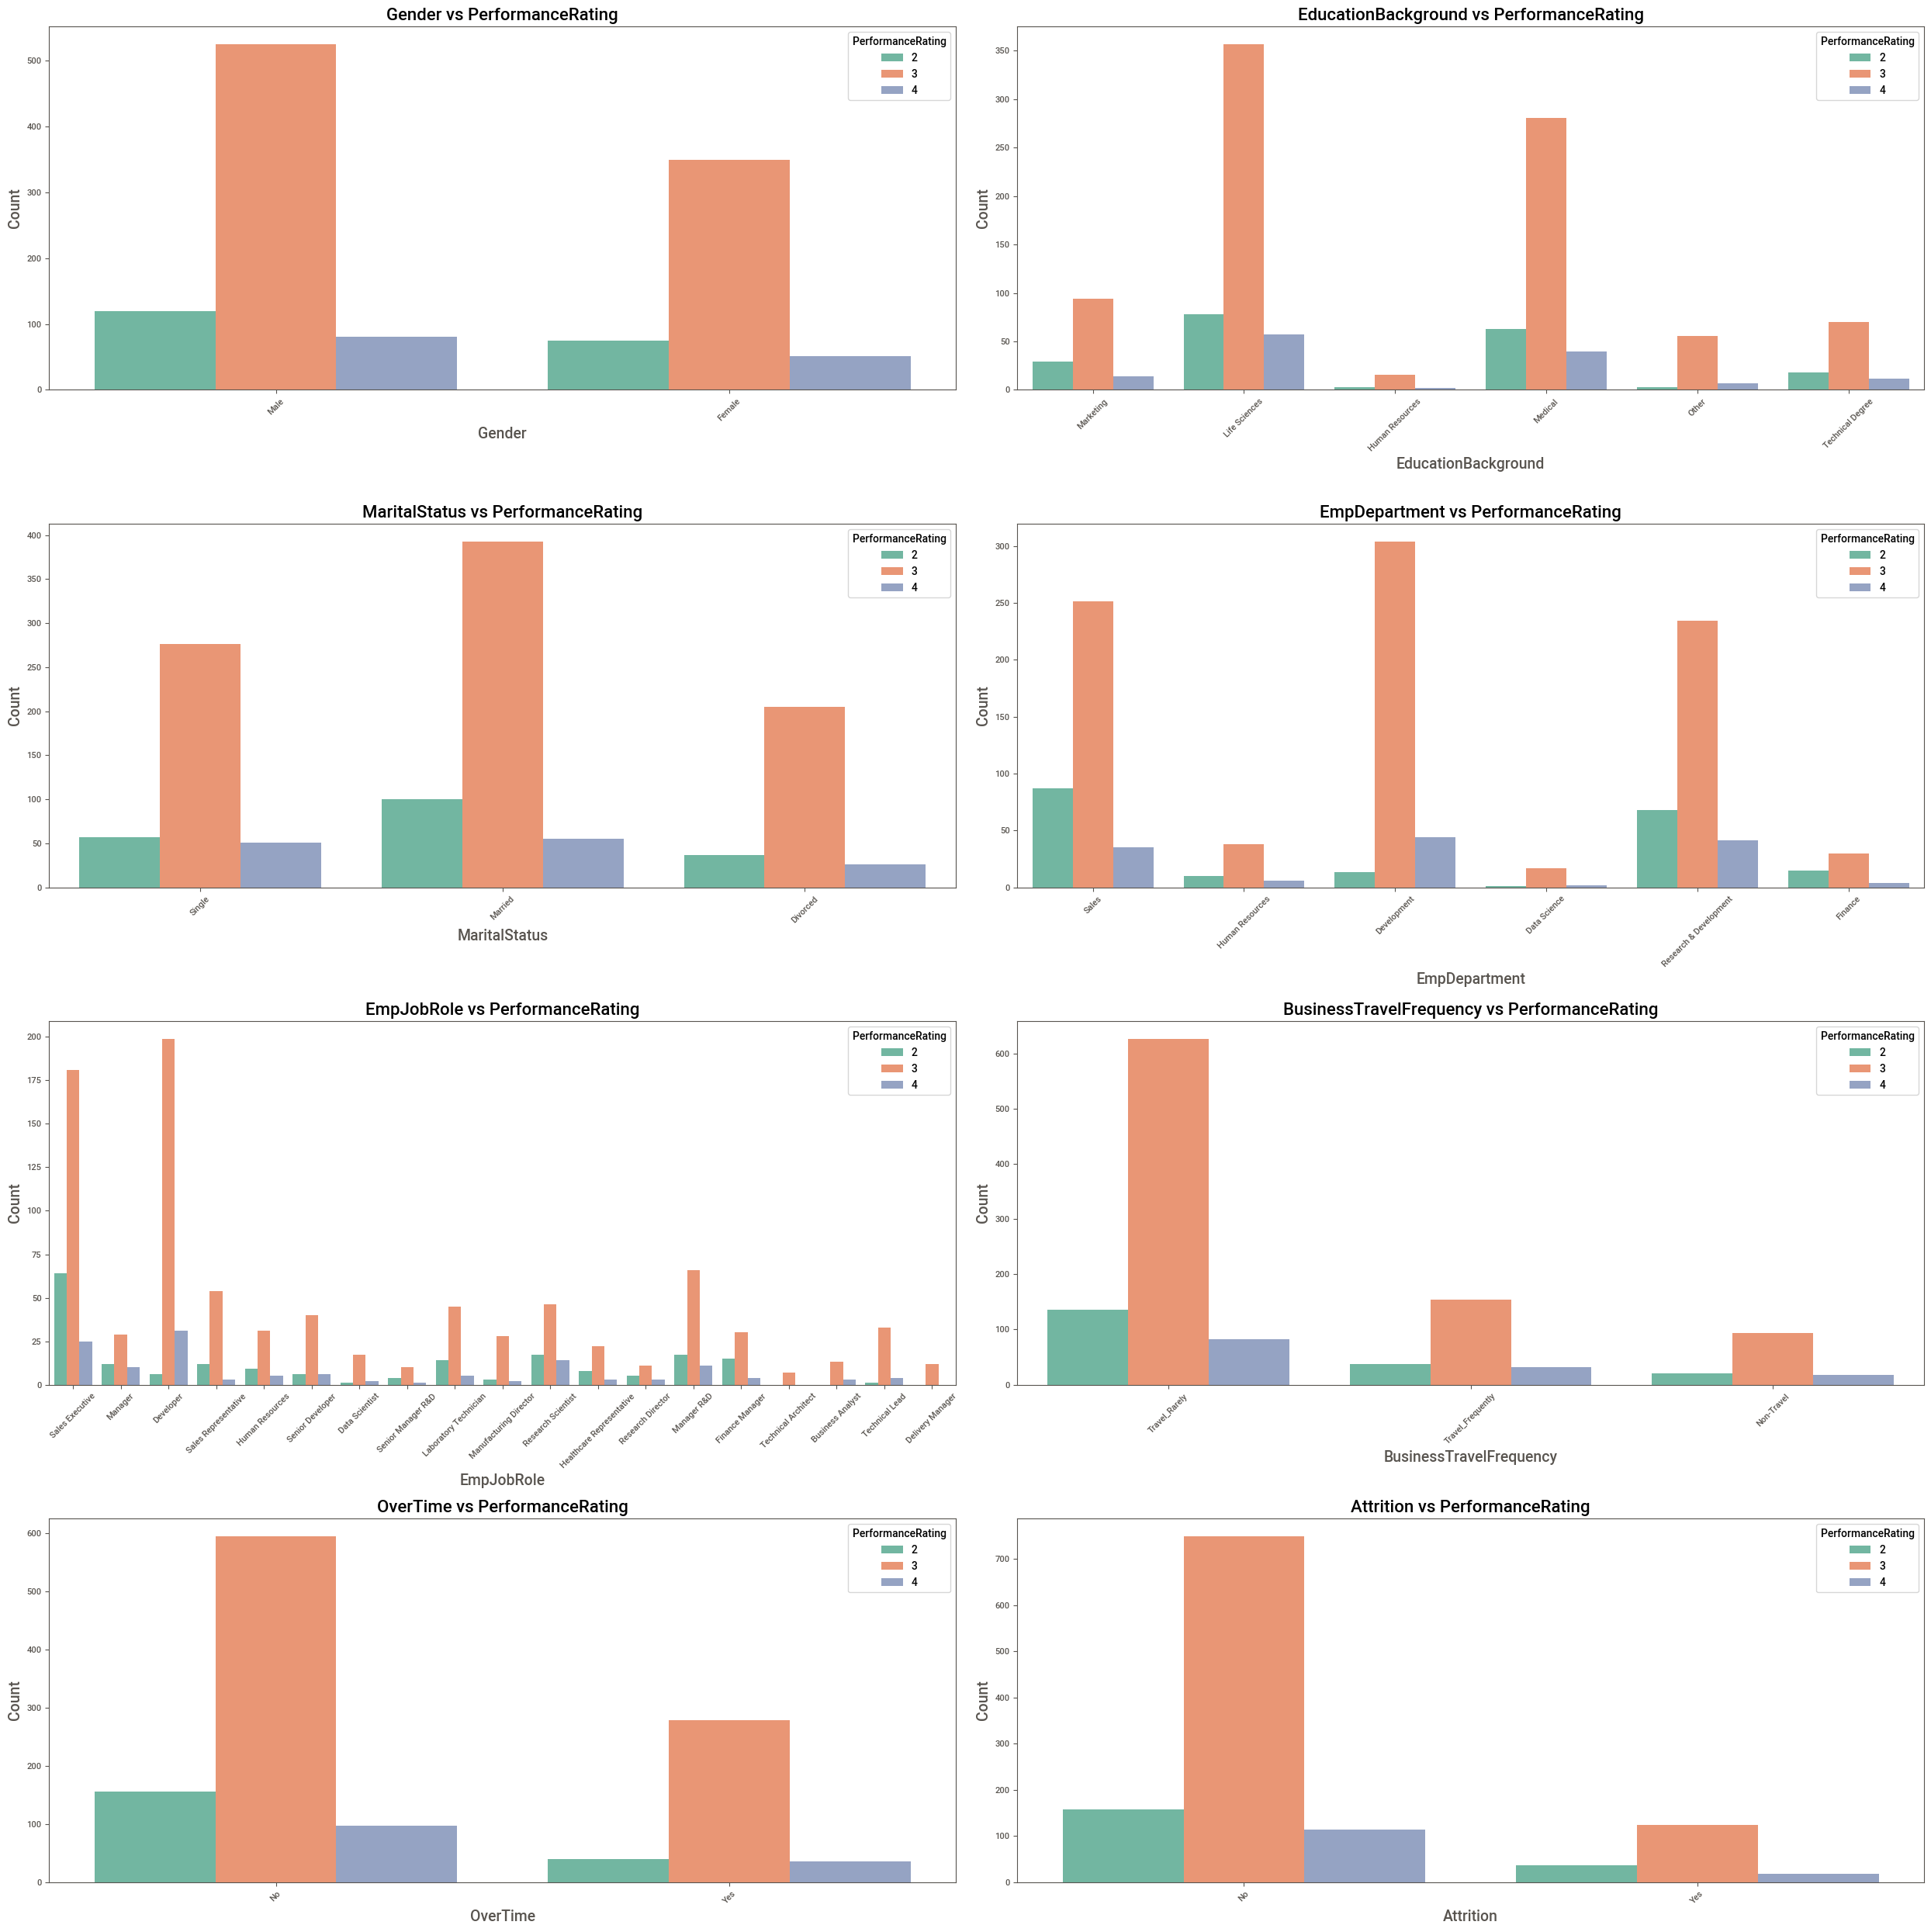

In [30]:
# Set up the canvas
plt.figure(figsize=(25, 25), facecolor='white')  # Adjust size to your liking
plotnumber = 1

# Loop through each categorical column
for column in categorical_cols:
    if plotnumber <= len(categorical_cols):
        ax = plt.subplot(4,2, plotnumber)  # Adjust grid size if needed
        sns.countplot(x=data[column], hue=data['PerformanceRating'], palette='Set2')
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Count', fontsize=14)
        plt.xticks(rotation=45)
        plt.title(f'{column} vs PerformanceRating', fontsize=16)
        plotnumber += 1

plt.tight_layout()
plt.show()


**1. Gender vs Performance Rating** Performance distribution is fairly similar across genders. Both males and females predominantly fall under Performance Rating 3, with only slight differences in higher ratings. Gender does not appear to be a strong differentiator in performance.

**2. Education Background vs Performance Rating** Employees from Life Sciences and Medical backgrounds have the highest counts and also show relatively higher representation in Rating 4. Marketing and Technical Degree have lower employee counts and limited representation in high-performance ratings. Education background may have some influence, particularly in fields aligned with the business domain.

**3. Marital Status vs Performance Rating** Married employees form the largest group, with most in Rating 3. Single employees have slightly more variation across Rating 4 and 5, indicating a potential for higher performance in certain cases. However, the pattern isn’t sharp enough to suggest a strong impact.

**4. Department vs Performance Rating** Development and Data Science departments have better representation in higher ratings (4 and 5). Sales and Finance are skewed more toward Rating 3, aligning with earlier findings on departmental performance averages.
Department appears to significantly influence performance outcomes.

**5. EmpJobRole vs PerformanceRating** Roles like Developer and Data Scientist show better representation in Ratings 4 and 5. Sales Executive and Lab Technician roles are mostly clustered around Rating 3. This suggests that roles with technical or analytical focus may be linked to higher performance ratings, possibly due to clearer KPIs or skill alignment.

**6. BusinessTravelFrequency vs PerformanceRating** Employees who rarely travel dominate the workforce and are primarily concentrated at Rating 3. Those who never travel have a slightly higher share in top ratings (4 and 5). This may imply that less travel correlates with greater focus, consistency, or availability—beneficial for performance in certain roles.

**7. OverTime vs PerformanceRating** Employees who do not work overtime are more concentrated in higher performance ratings. Those who work overtime tend to cluster around Rating 3. This might indicate that excessive workload doesn’t necessarily translate to better results and may, in fact, hinder sustained performance.

**8. Attrition vs PerformanceRating** Employees who left the organization (Attrition = Yes) mostly have a Rating of 3, with fewer high performers among them. Those who stayed show a broader spread into Ratings 4 and 5. This pattern suggests that retaining high performers is crucial and that lower-rated employees may be more likely to leave or be let go.

In [32]:
#Extract integer-type columns
int_columns = data.select_dtypes(include='int').columns.tolist()
int_columns

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating']

In [33]:
# Remove target column is it's in the list
if 'PerformanceRating' in int_columns:
    int_columns.remove('PerformanceRating')

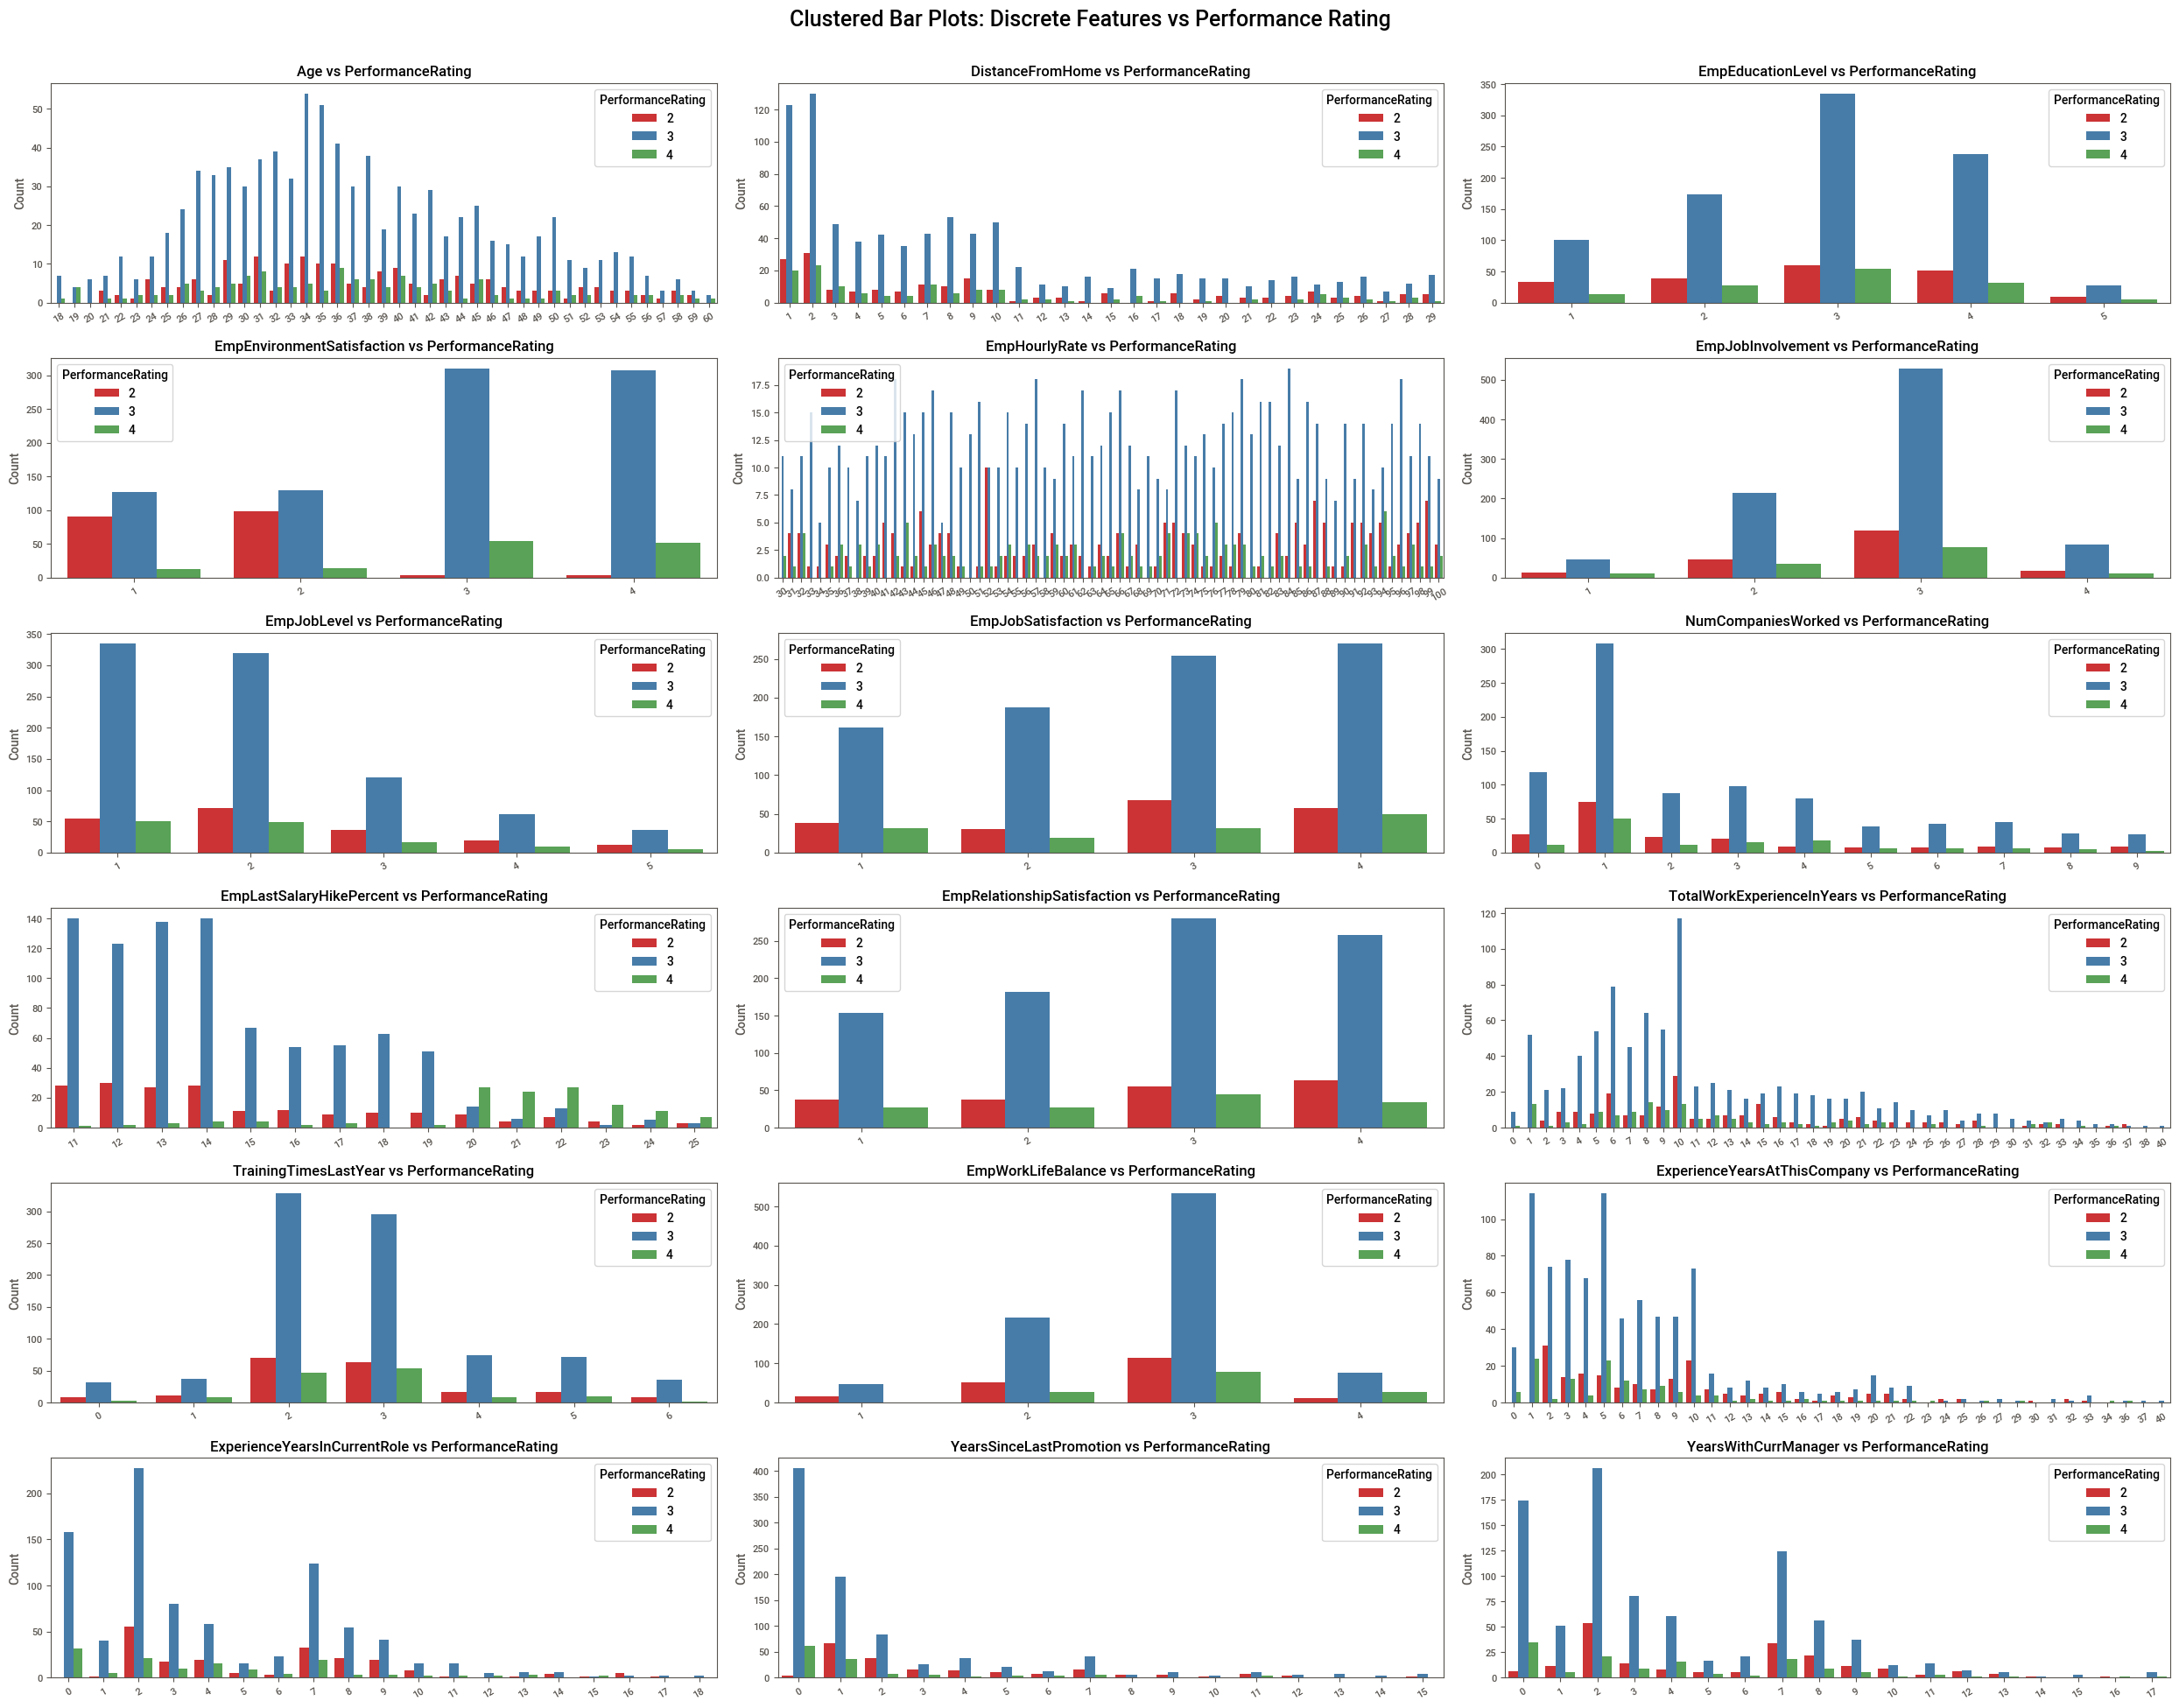

In [34]:
# Set up the camnvas
plt.figure(figsize=(25,25),facecolor = 'white')
plotnumber = 1
for column in int_columns:
    if plotnumber <= len(int_columns):
        ax = plt.subplot(8,3,plotnumber)
        sns.countplot(data=data , x=data[column], hue='PerformanceRating',palette='Set1')
        plt.title(f"{column} vs PerformanceRating",fontsize=12)
        plt.xlabel("")
        plt.ylabel("Count")
        plt.xticks(rotation=30)
        plotnumber += 1

plt.tight_layout()
plt.suptitle('Clustered Bar Plots: Discrete Features vs Performance Rating', fontsize=18,y=1.02)
plt.show()

**1. Age vs Performance Rating** Employees aged 30–40 show slightly higher occurrences of top ratings (4 & 5). Performance dips a bit at the extremes (younger and older groups).

**2. Distance From Home vs Performance Rating** Most performers live within 5–15 km; no strong link between distance and performance. Slight concentration of low performance among those farthest from work.

**3. Education Level vs Performance Rating** Education levels 3 and 4 show stronger representation in higher ratings. Suggests some alignment between education depth and performance.

**4. Environment Satisfaction vs Performance Rating** Higher satisfaction (Level 4) correlates with better performance. Dissatisfied employees (Level 1 & 2) lean toward Rating 3 or below.

**5. Hourly Rate vs Performance Rating** No distinct trend; all performance levels occur across pay bands. Hourly rate doesn’t appear to be a strong standalone predictor.

**6. Job Involvement vs Performance Rating** Involvement Levels 3 and 4 align with higher ratings. Clear positive relationship between engagement and performance.

**7. Job Level vs Performance Rating** Senior roles (Level 4 & 5) see more Ratings 4 & 5. Suggests experience or seniority supports stronger performance.

**8. Job Satisfaction vs Performance Rating** Employees with higher satisfaction levels have better ratings. Level 4 stands out with a healthy distribution across top ratings.

**9. Last Salary Hike % vs Performance Rating** Higher hikes (15–20%) correspond to better ratings. Low hikes (<12%) are mostly seen with Performance 3 or below.

**10. Relationship Satisfaction vs Performance Rating** Level 3 shows most employees, but Level 4 has more high performers. Positive work relationships likely help drive performance.

**11. Number of Companies Worked vs Performance Rating** Fewer job changes (0–2 companies) link with better ratings. High job hopping doesn’t clearly boost performance.

**12. Total Work Experience vs Performance Rating** Employees with 5–15 years of experience show stronger ratings. Very low and very high experience groups skew toward mid ratings.

**13. Training Times Last Year vs Performance Rating** Employees with 2–3 training sessions show slightly better performance. Very low or very high training frequencies don’t correlate strongly with high ratings—suggesting quality > quantity.

**14. Work-Life Balance vs Performance Rating** Level 3 and 4 work-life balance aligns with higher performance ratings. Indicates that a healthy balance positively impacts output.

**15. Experience Years at This Company vs Performance Rating** Employees with 5–10 years at the company show more top ratings. New joiners and those with long tenures have flatter performance distributions.

**16. Experience Years in Current Role vs Performance Rating** 3–6 years in current role is linked with stronger performance. Suggests optimal impact window before growth stagnates.

**17. Years Since Last Promotion vs Performance Rating** Employees promoted within the last 1–2 years are more likely to have high ratings. Longer durations since last promotion show slightly weaker performance.

**18. Years With Current Manager vs Performance Rating** Ratings are more favorable when manager tenure is 3–5 years. Extremely short or long relationships may not foster peak performance consistently.

#### Task 1 : Department-wise Performance Analysis

In [37]:
# Calculate Average Performance per Department

dept_perf = data.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index().sort_values(by = 'PerformanceRating',ascending = False)
print(dept_perf)

            EmpDepartment  PerformanceRating
1             Development           3.085873
0            Data Science           3.050000
3         Human Resources           2.925926
4  Research & Development           2.921283
5                   Sales           2.860590
2                 Finance           2.775510


In [38]:
# Visualization using plotly

In [39]:
import plotly.express as px

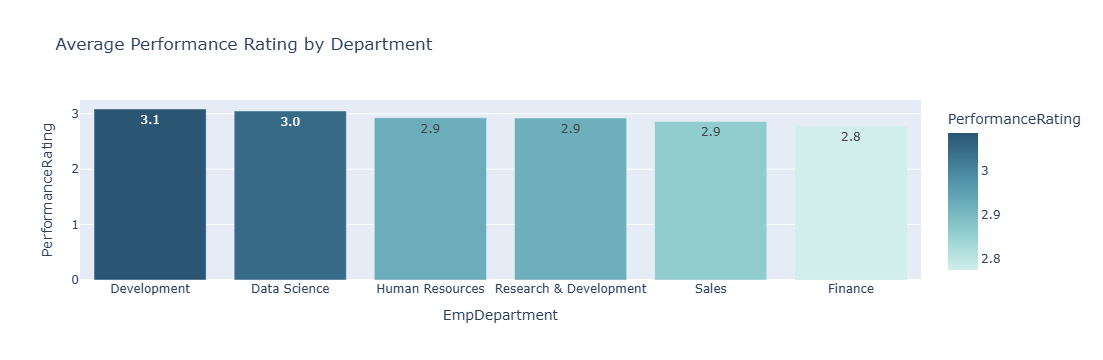

In [40]:
fig = px.bar(dept_perf,x='EmpDepartment',y='PerformanceRating',text_auto=".2s",
            color='PerformanceRating',color_continuous_scale='Teal',
            title = 'Average Performance Rating by Department')
fig.show()

In [41]:
# Build the combined DataFrame
dept_stats = data.groupby('EmpDepartment').agg({'PerformanceRating':'mean','EmpDepartment':'count'}).rename(columns={
    'PerformanceRating':'AvgPerformance',
    'EmpDepartment':'EmpCount'
}).reset_index()  # Count the number of rows per department

In [42]:
dept_stats

EmpDepartment  AvgPerformance  EmpCount
0            Data Science        3.050000        20
1             Development        3.085873       361
2                 Finance        2.775510        49
3         Human Resources        2.925926        54
4  Research & Development        2.921283       343
5                   Sales        2.860590       373

In [43]:
# Dual-Axis Visualization

C:\Users\ruchi\AppData\Local\Temp\ipykernel_9580\143143016.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




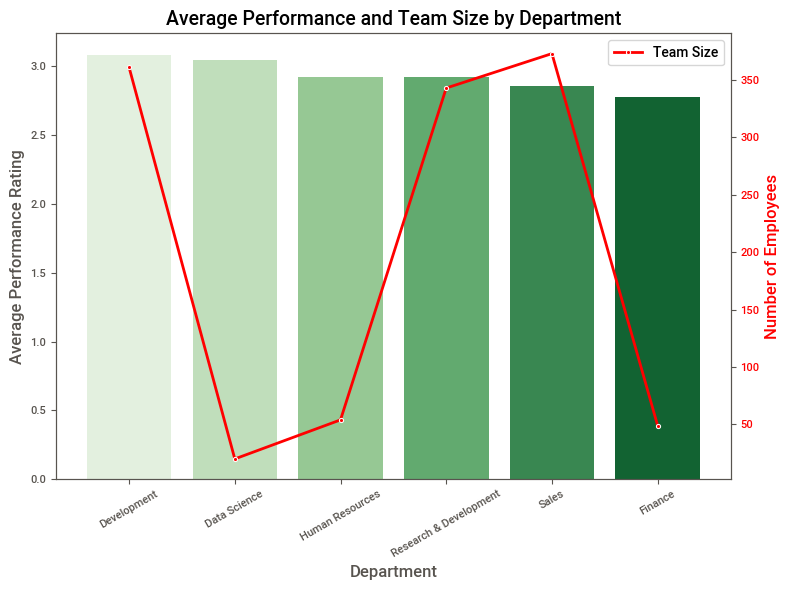

In [44]:
# Sort by average performance for a clean visual flow
dept_stats = dept_stats.sort_values(by='AvgPerformance', ascending=False)

fig, ax1 = plt.subplots(figsize=(8,6))
sns.barplot(data=dept_stats, x='EmpDepartment', y='AvgPerformance', ax=ax1, palette='Greens')
ax1.set_ylabel('Average Performance Rating', fontsize=12)
ax1.set_xlabel('Department', fontsize=12)
ax1.set_title('Average Performance and Team Size by Department', fontsize=14)
ax1.tick_params(axis='x', rotation=30)

# Secondary axis: plot employee count
ax2 = ax1.twinx()
sns.lineplot(data=dept_stats, x='EmpDepartment', y='EmpCount',
             ax=ax2, color='red', linewidth=2, marker='o', label='Team Size')
ax2.set_ylabel('Number of Employees', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Optional: Show legend
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Conclusion :** Different departments show varying performance levels. The Development team, with one of the largest headcounts (361 employees), achieves the highest average performance (3.09), reflecting strong operational effectiveness. In contrast, Sales, the largest team (373 employees), has the lowest average performance (2.86), suggesting an urgent need for targeted improvements. Meanwhile, the small but high-performing Data Science team stands out—likely benefiting from focused collaboration and specialized expertise. These patterns help identify where support or strategy shifts may be needed across departments.

### Data prepocessing

#### Checking missing values

In [48]:
data.isnull().sum()

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

#### Encoding

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [51]:
# Gender

In [52]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [53]:
# Convert 'Gender' column into binary numeric format using one-hot encoding
# 'Male' becomes 1, 'Female' (dropped by drop_first=True) becomes the reference (0)

data.Gender=pd.get_dummies(data.Gender,drop_first=True).astype(int)

In [54]:
# EducationBackground

In [55]:
data.EducationBackground.unique()

array(['Marketing', 'Life Sciences', 'Human Resources', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [56]:
# Mapping categorical 'EducationBackground' to ordinal numerical values
data.EducationBackground = data.EducationBackground.map({'Marketing':5, 'Life Sciences':4, 'Human Resources':3, 'Medical':2,
       'Other':1, 'Technical Degree':0})

In [57]:
# MaritalStatus

In [58]:
data.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [59]:
data.MaritalStatus = data.MaritalStatus.map({'Single':2, 'Married':1, 'Divorced':0})

In [60]:
# EmpDepartment   

In [61]:
data.EmpDepartment.unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [62]:
data.EmpDepartment = data.EmpDepartment.map({'Sales':5, 'Human Resources':4, 'Development':3, 'Data Science':2,
       'Research & Development':1, 'Finance':0})

In [63]:
# EmpJobRole 

In [64]:
data.EmpJobRole.unique()

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

In [65]:
# Traget Encoding
# Create the mapping of EmpJobRole to average PerformanceRating
role_perf_map = data.groupby('EmpJobRole')['PerformanceRating'].mean()

# Map that average back into a new column
data['EmpJobRole'] = data['EmpJobRole'].map(role_perf_map)

In [66]:
# BusinessTravelFrequency

In [67]:
data.BusinessTravelFrequency.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [68]:
data.BusinessTravelFrequency = data.BusinessTravelFrequency.map({'Travel_Rarely':2, 'Travel_Frequently':1, 'Non-Travel':0})

In [69]:
# OverTime

In [70]:
data.OverTime.unique()

array(['No', 'Yes'], dtype=object)

In [71]:
data.OverTime=pd.get_dummies(data.OverTime,drop_first=True).astype(int)

In [72]:
# Attrition 

In [73]:
data.Attrition.unique()

array(['No', 'Yes'], dtype=object)

In [74]:
data.Attrition = pd.get_dummies(data.Attrition,drop_first=True).astype(int)

#### Check for outliers

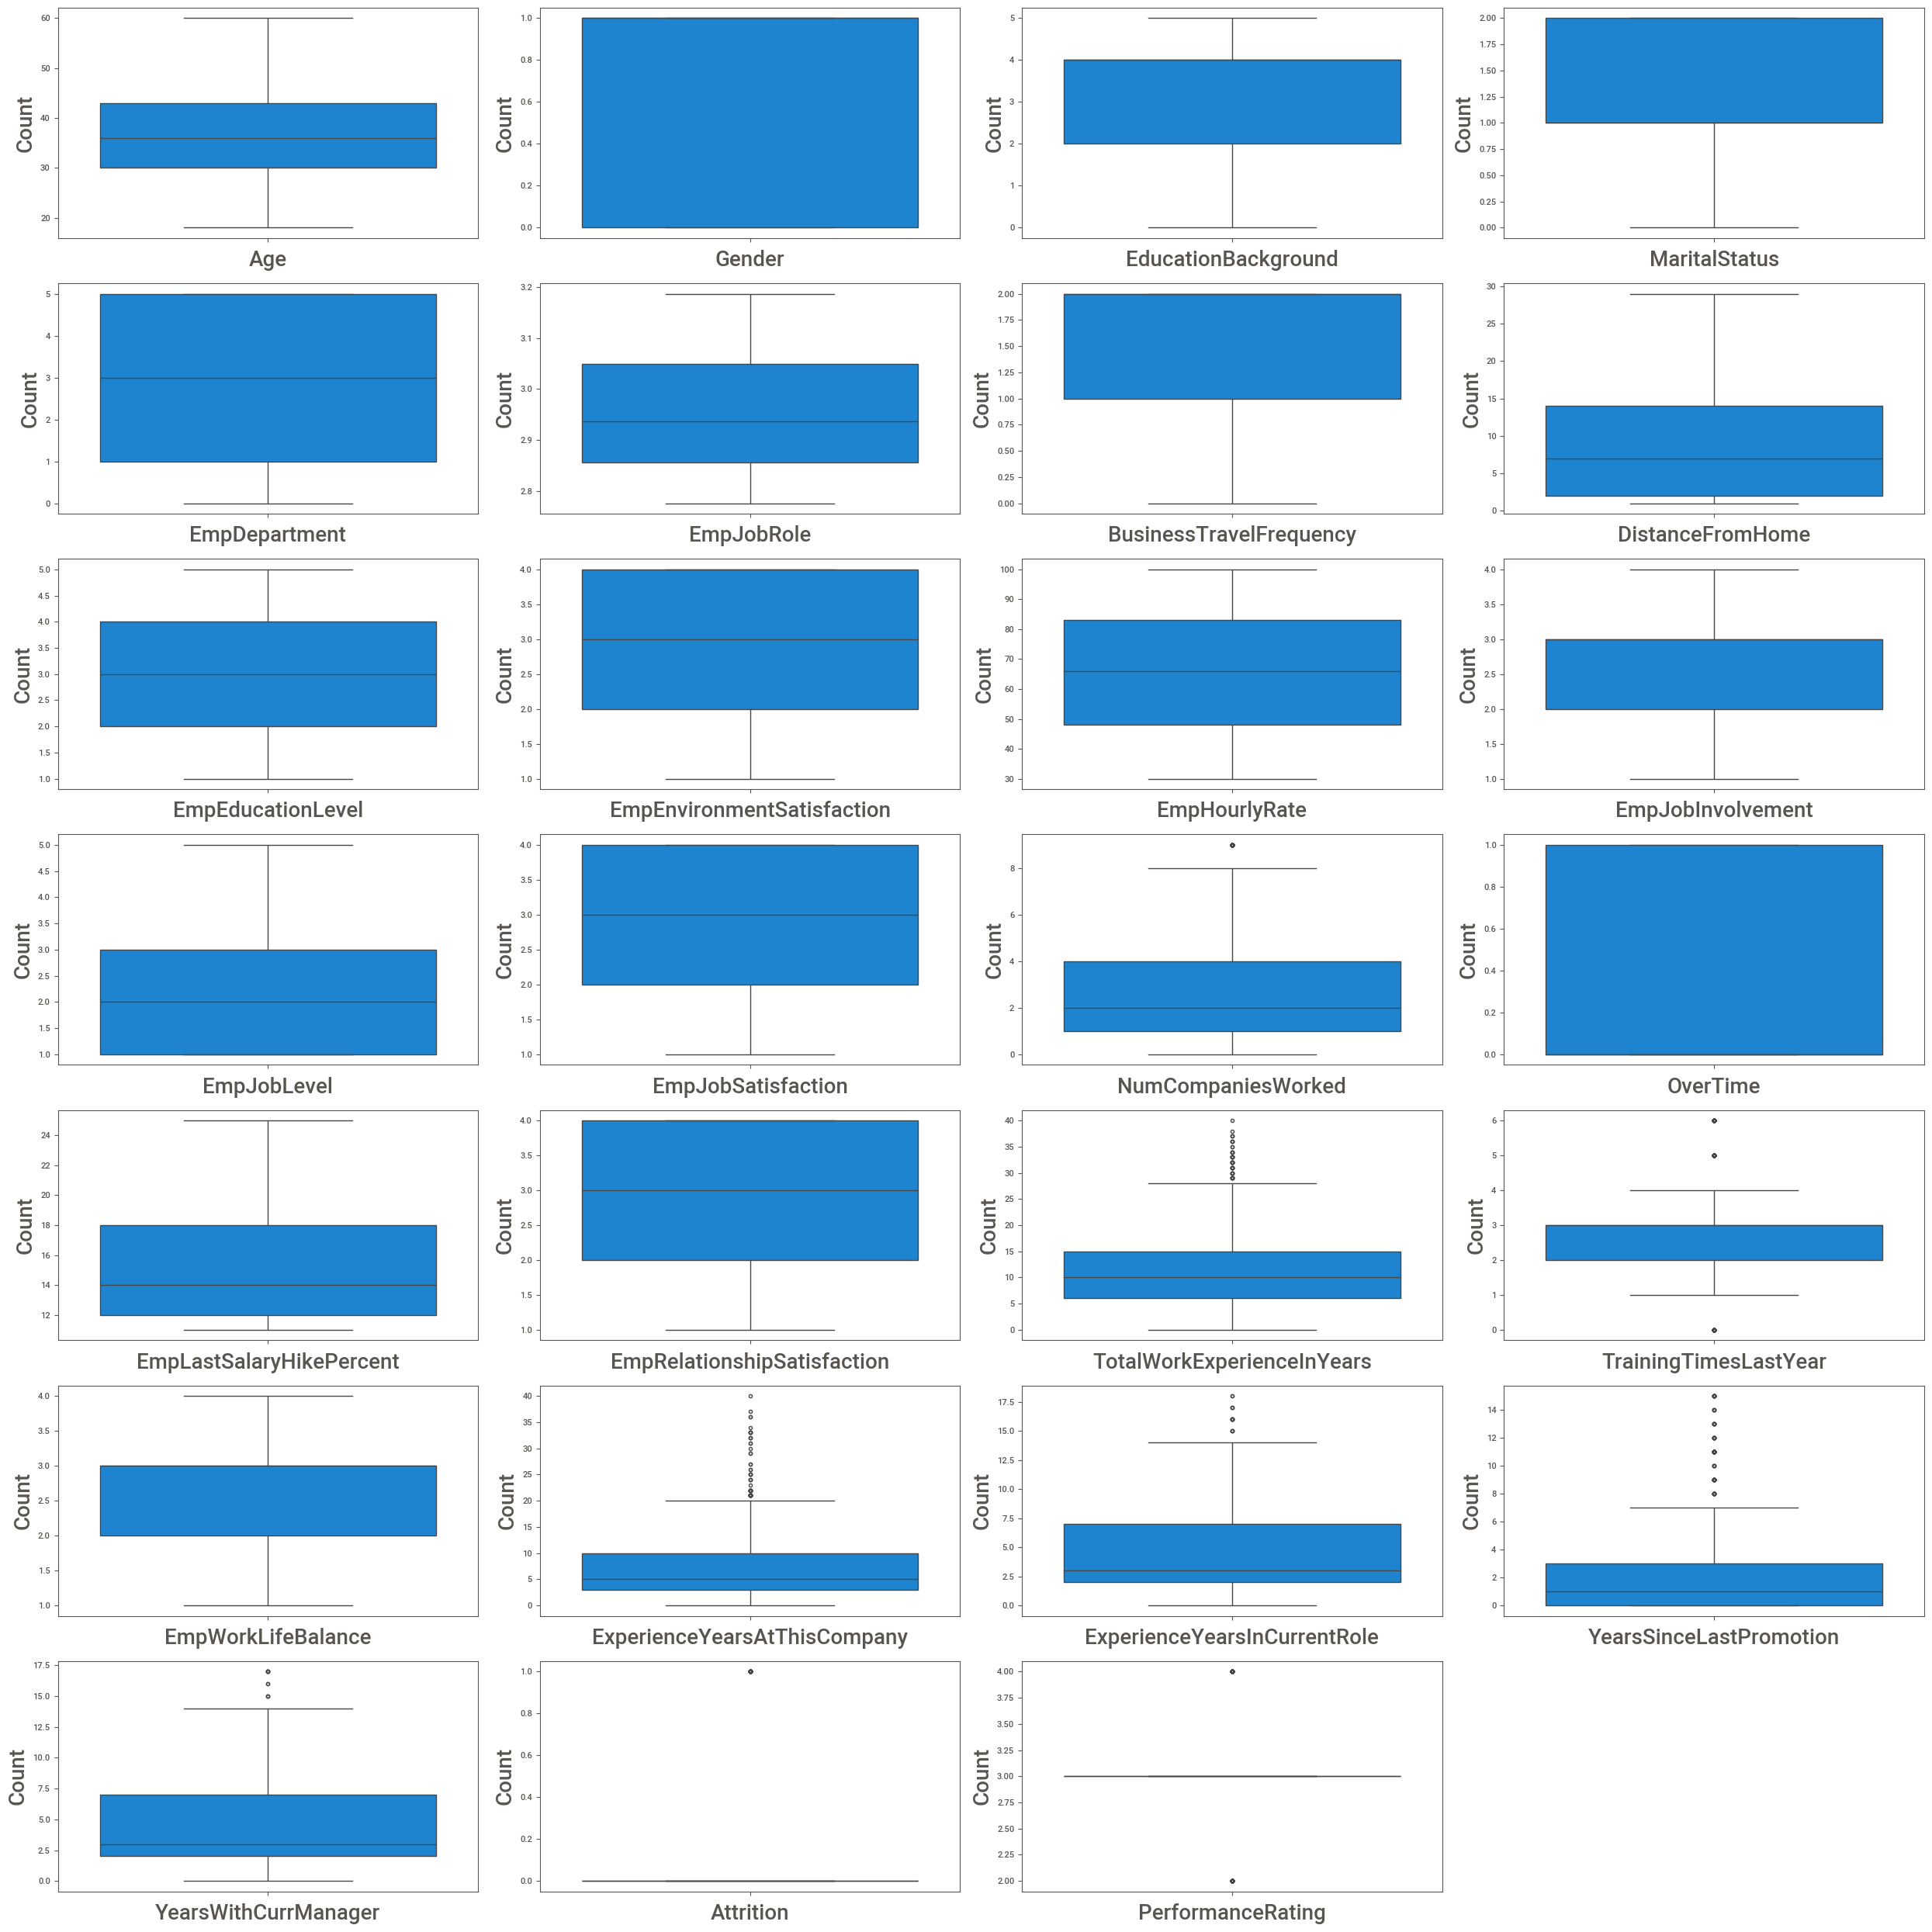

In [76]:
plt.figure(figsize=(25,25))

plotnumber=1
for column in data:
    if plotnumber<=27:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [77]:
# Outlier handling 
# Creating a function that first calculate the IQR and then filter out the outliers

In [78]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = data[column].median() 
    data[column] = data[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x) 
    return sns.boxplot(x=column,data=data)

In [79]:
# Age

<Axes: xlabel='Age'>

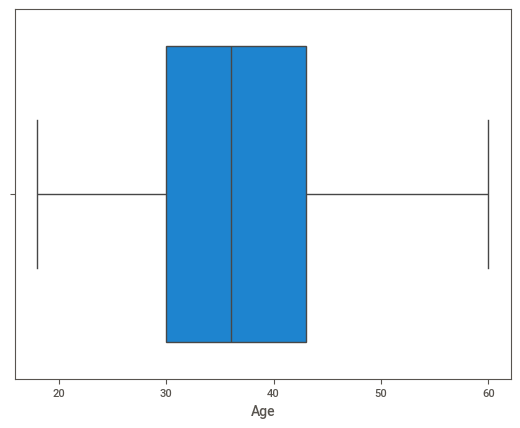

In [80]:
sns.boxplot(x='Age',data=data)

In [81]:
# Gender

<Axes: xlabel='Gender'>

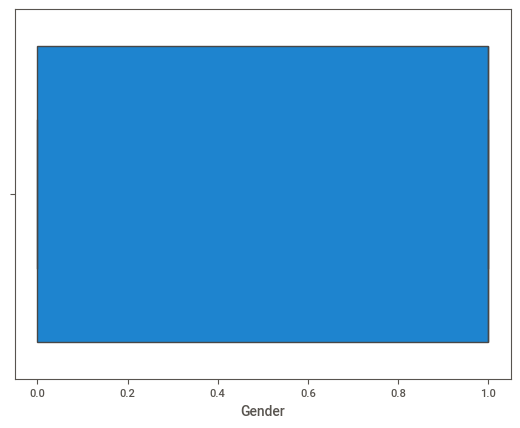

In [82]:
sns.boxplot(x='Gender',data=data)

In [83]:
# EducationBackground

<Axes: xlabel='EducationBackground'>

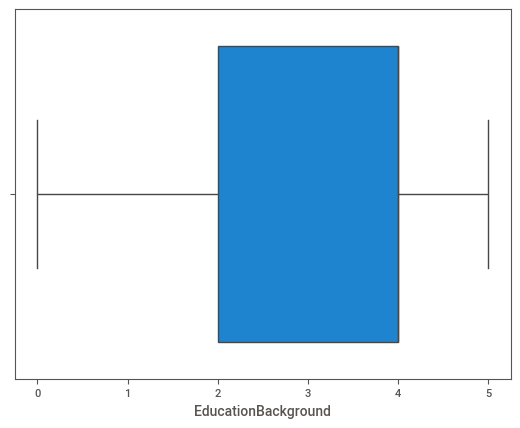

In [84]:
sns.boxplot(x='EducationBackground',data=data)

In [85]:
# MaritalStatus

<Axes: xlabel='MaritalStatus'>

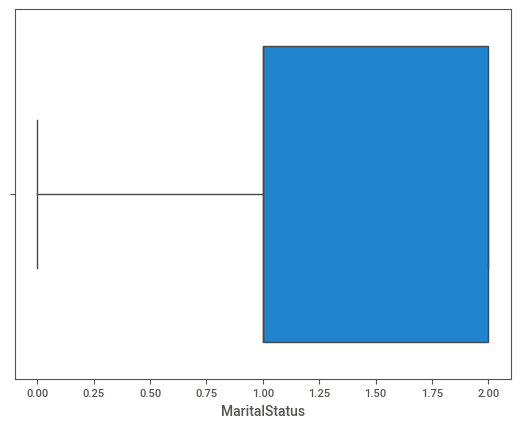

In [86]:
sns.boxplot(x='MaritalStatus',data=data)

In [87]:
# EmpDepartment

<Axes: xlabel='EmpDepartment'>

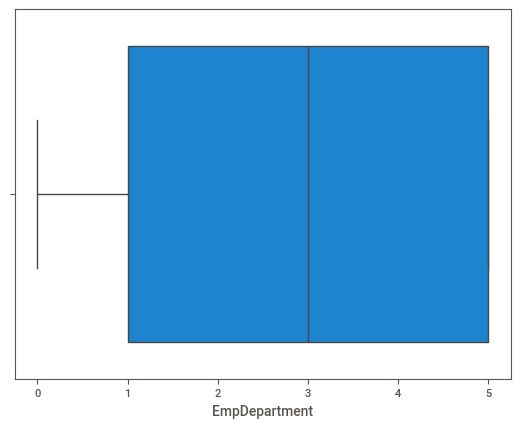

In [88]:
sns.boxplot(x='EmpDepartment',data=data)

In [89]:
# EmpJobRole

<Axes: xlabel='EmpJobRole'>

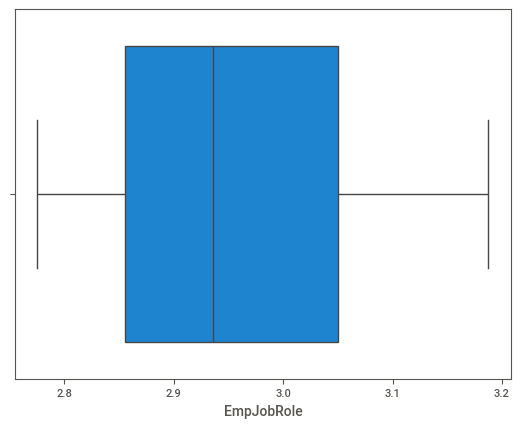

In [90]:
sns.boxplot(x='EmpJobRole',data=data)

In [91]:
# BusinessTravelFrequency

<Axes: xlabel='BusinessTravelFrequency'>

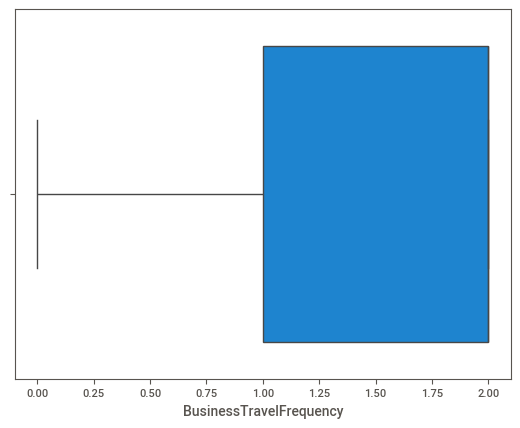

In [92]:
sns.boxplot(x='BusinessTravelFrequency',data=data)

In [93]:
# DistanceFromHome

<Axes: xlabel='DistanceFromHome'>

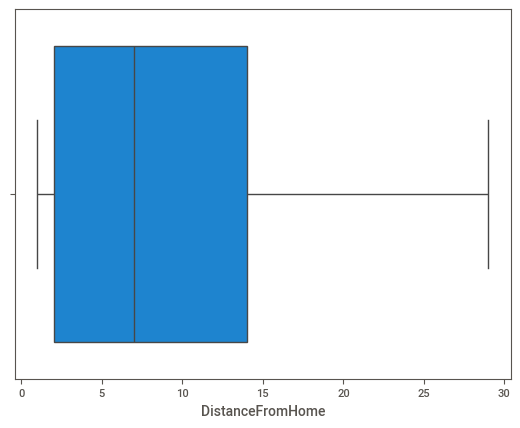

In [94]:
sns.boxplot(x='DistanceFromHome',data=data)

In [95]:
# EmpEducationLevel

<Axes: xlabel='EmpEducationLevel'>

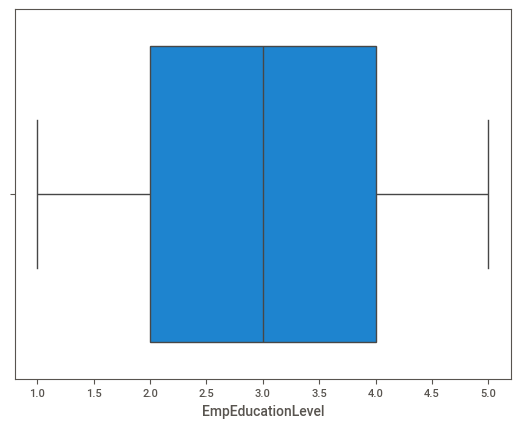

In [96]:
sns.boxplot(x='EmpEducationLevel',data=data)

In [97]:
# EmpEnvironmentSatisfaction

<Axes: xlabel='EmpEnvironmentSatisfaction'>

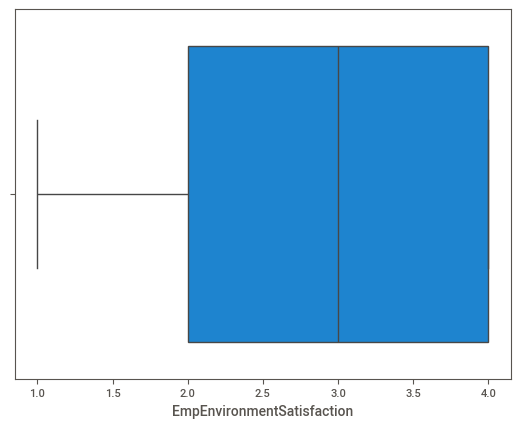

In [98]:
sns.boxplot(x='EmpEnvironmentSatisfaction',data=data)

In [99]:
# EmpHourlyRate

<Axes: xlabel='EmpHourlyRate'>

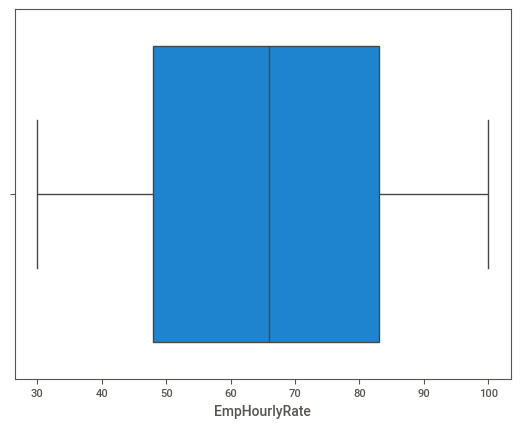

In [100]:
sns.boxplot(x='EmpHourlyRate',data=data)

In [101]:
# EmpJobInvolvement

<Axes: xlabel='EmpJobInvolvement'>

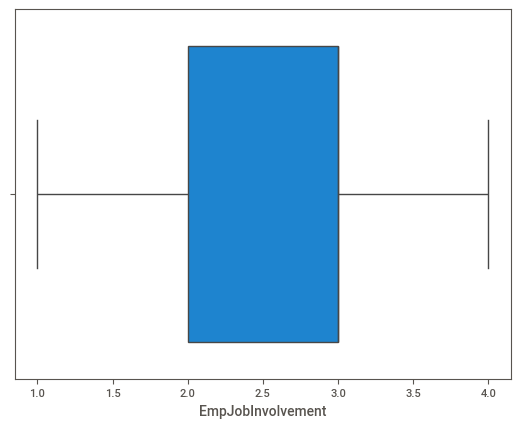

In [102]:
sns.boxplot(x='EmpJobInvolvement',data=data)

In [103]:
# EmpJobLevel

<Axes: xlabel='EmpJobLevel'>

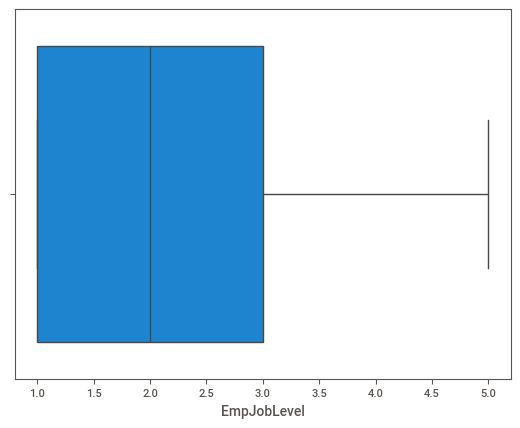

In [104]:
sns.boxplot(x='EmpJobLevel',data=data)

In [105]:
# EmpJobSatisfaction

<Axes: xlabel='EmpJobSatisfaction'>

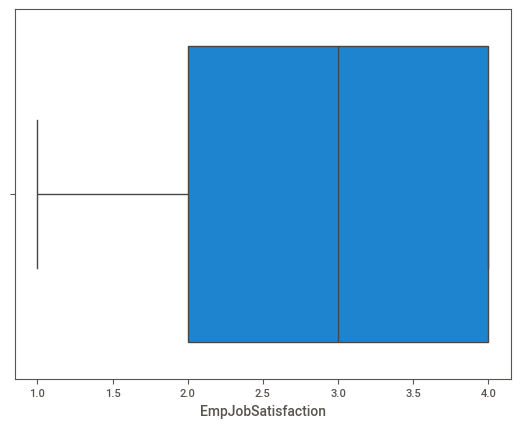

In [106]:
sns.boxplot(x='EmpJobSatisfaction',data=data)

In [107]:
# NumCompaniesWorked

<Axes: xlabel='NumCompaniesWorked'>

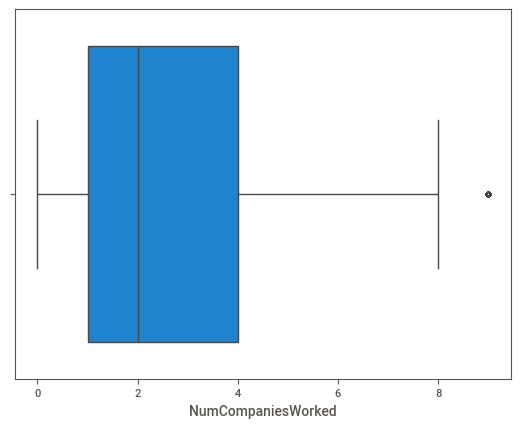

In [108]:
sns.boxplot(x='NumCompaniesWorked',data=data)

<Axes: xlabel='NumCompaniesWorked'>

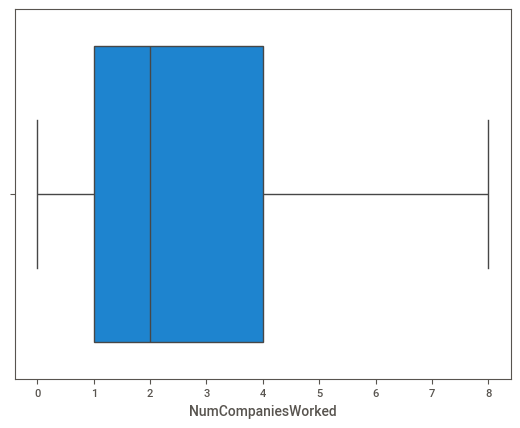

In [109]:
remove_outliers(data,'NumCompaniesWorked')

In [110]:
# OverTime

<Axes: xlabel='OverTime'>

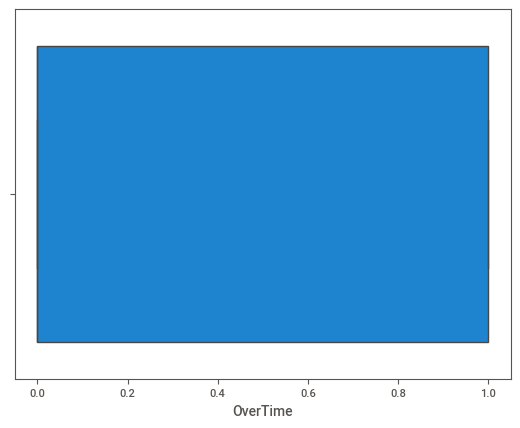

In [111]:
sns.boxplot(x='OverTime',data=data)

In [112]:
# EmpLastSalaryHikePercent

<Axes: xlabel='EmpLastSalaryHikePercent'>

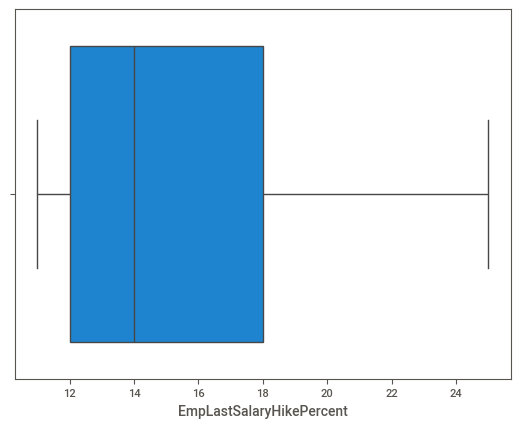

In [113]:
sns.boxplot(x='EmpLastSalaryHikePercent',data=data)

In [114]:
# EmpRelationshipSatisfaction

<Axes: xlabel='EmpRelationshipSatisfaction'>

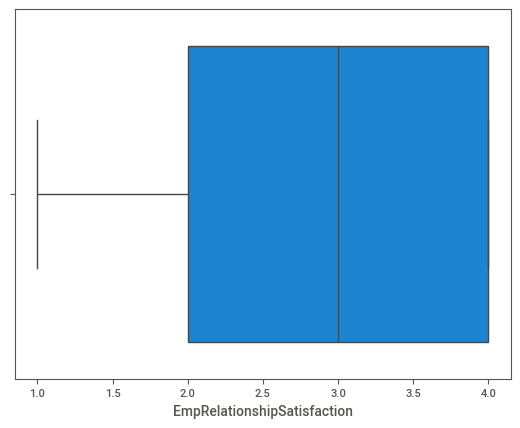

In [115]:
sns.boxplot(x='EmpRelationshipSatisfaction',data=data)

In [116]:
# TotalWorkExperienceInYears

<Axes: xlabel='TotalWorkExperienceInYears'>

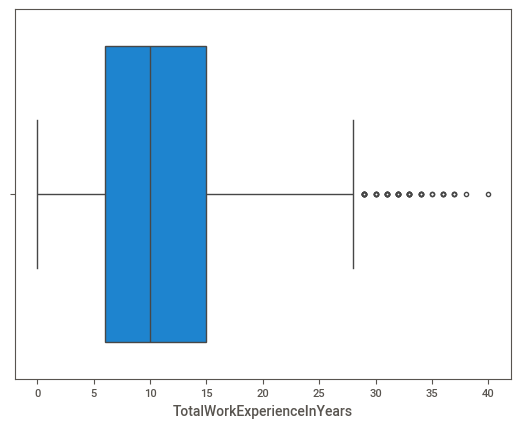

In [117]:
sns.boxplot(x='TotalWorkExperienceInYears',data=data)

<Axes: xlabel='TotalWorkExperienceInYears'>

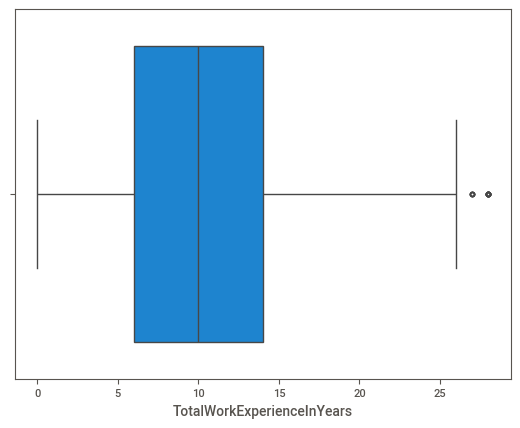

In [118]:
remove_outliers(data,'TotalWorkExperienceInYears')

In [119]:
# TrainingTimesLastYear

<Axes: xlabel='TrainingTimesLastYear'>

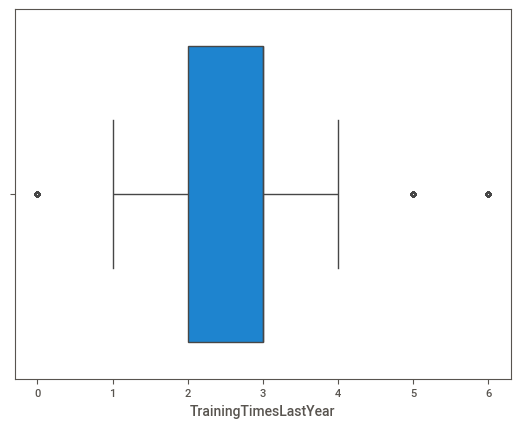

In [120]:
sns.boxplot(x='TrainingTimesLastYear',data=data)

<Axes: xlabel='TrainingTimesLastYear'>

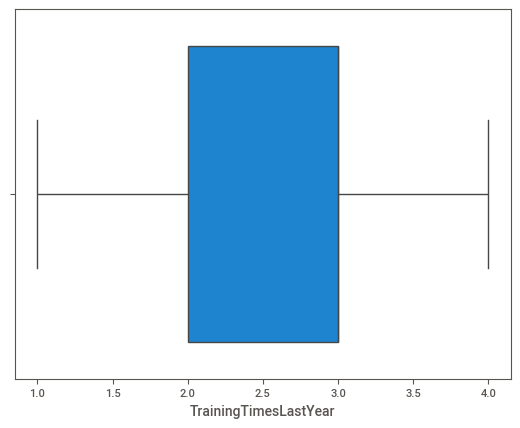

In [121]:
remove_outliers(data,'TrainingTimesLastYear')

In [122]:
# EmpWorkLifeBalance

<Axes: xlabel='EmpWorkLifeBalance'>

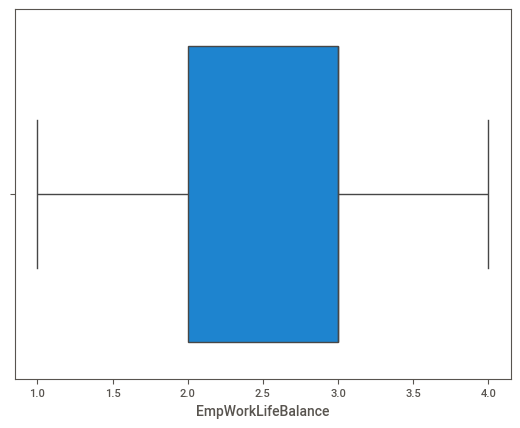

In [123]:
sns.boxplot(x='EmpWorkLifeBalance',data=data)

In [124]:
# ExperienceYearsAtThisCompany

<Axes: xlabel='ExperienceYearsAtThisCompany'>

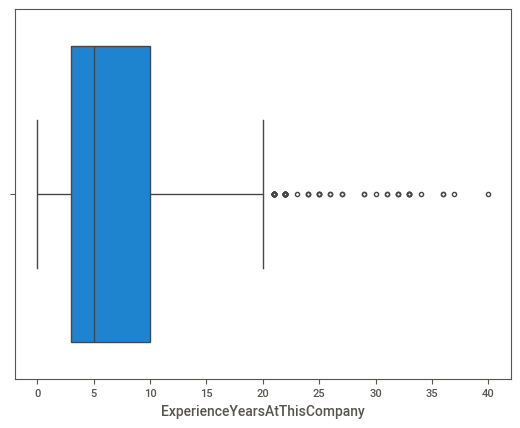

In [125]:
sns.boxplot(x='ExperienceYearsAtThisCompany',data=data)

<Axes: xlabel='ExperienceYearsAtThisCompany'>

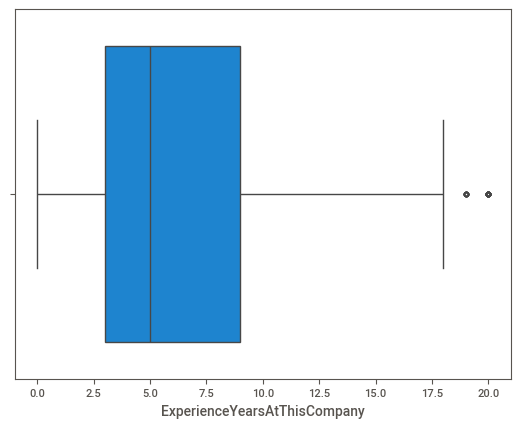

In [126]:
remove_outliers(data,'ExperienceYearsAtThisCompany')

In [127]:
# ExperienceYearsInCurrentRole

<Axes: xlabel='ExperienceYearsInCurrentRole'>

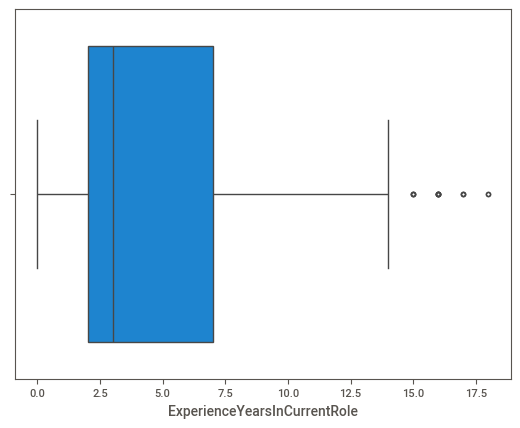

In [128]:
sns.boxplot(x='ExperienceYearsInCurrentRole',data=data)

<Axes: xlabel='ExperienceYearsInCurrentRole'>

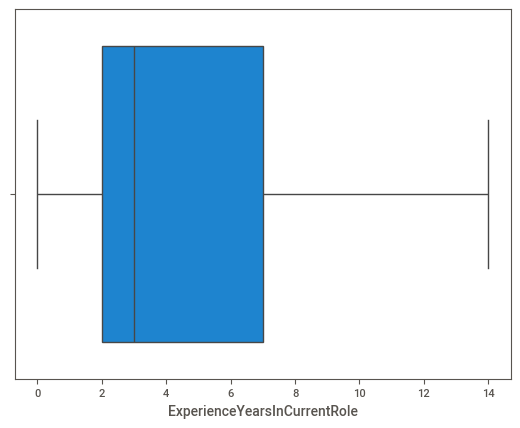

In [129]:
remove_outliers(data,'ExperienceYearsInCurrentRole')

In [130]:
# YearsSinceLastPromotion

<Axes: xlabel='YearsSinceLastPromotion'>

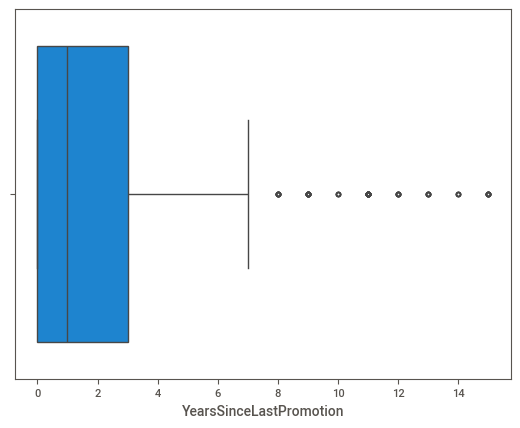

In [131]:
sns.boxplot(x='YearsSinceLastPromotion',data=data)

<Axes: xlabel='YearsSinceLastPromotion'>

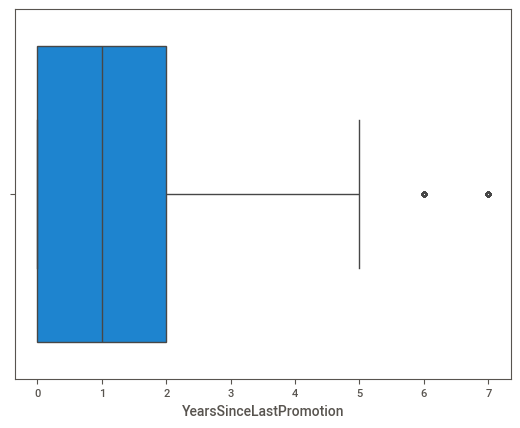

In [132]:
remove_outliers(data,'YearsSinceLastPromotion')

In [133]:
# YearsWithCurrManager

<Axes: xlabel='YearsWithCurrManager'>

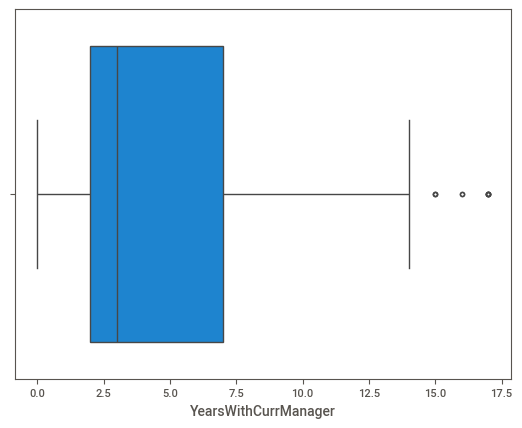

In [134]:
sns.boxplot(x='YearsWithCurrManager',data=data)

<Axes: xlabel='YearsWithCurrManager'>

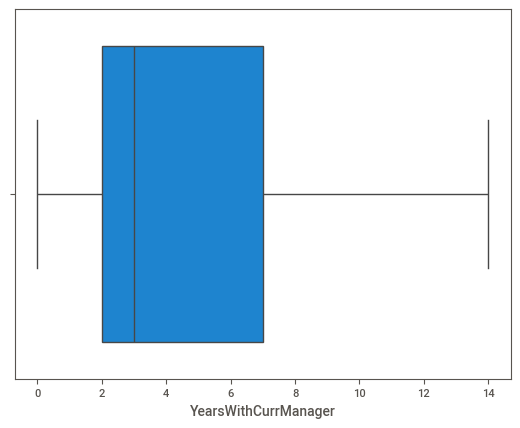

In [135]:
remove_outliers(data,'YearsWithCurrManager')

In [136]:
# Attrition

<Axes: xlabel='Attrition'>

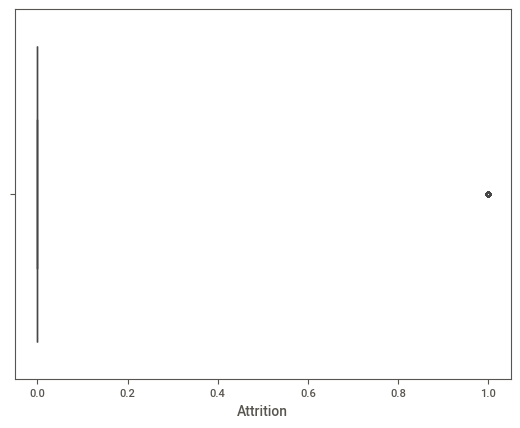

In [137]:
sns.boxplot(x='Attrition',data=data)

#### Task 2: Top 3 Important Factors effecting employee performance

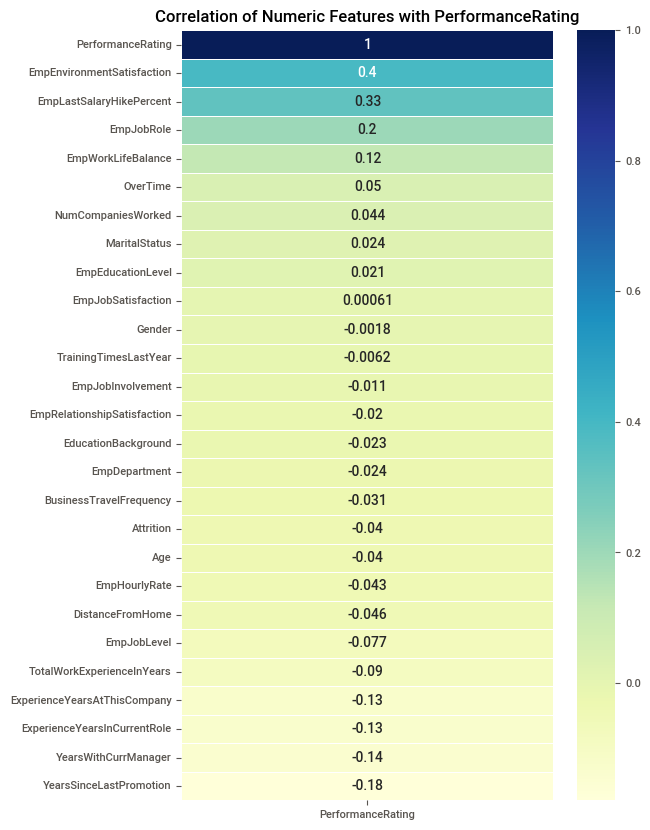

In [139]:
# Correlation matrix for numeric features
corr_matrix = data.corr(numeric_only=True)

# Sort by correlation with target
target_corr = corr_matrix[['PerformanceRating']].sort_values(by='PerformanceRating', ascending=False)

# Plot heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(target_corr, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Correlation of Numeric Features with PerformanceRating")
plt.show()


In [140]:
# Finding feature impoertance using Random forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [142]:
# Define target and features
X = data.drop('PerformanceRating', axis=1)
y = data['PerformanceRating']

In [143]:
# Train-test split (just for consistency — model isn't being evaluated here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [145]:
# Get feature importance scores
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

In [146]:
feat_imp

EmpLastSalaryHikePercent        0.204365
EmpEnvironmentSatisfaction      0.203133
YearsSinceLastPromotion         0.085984
EmpJobRole                      0.061673
ExperienceYearsInCurrentRole    0.041249
EmpHourlyRate                   0.037747
Age                             0.034589
ExperienceYearsAtThisCompany    0.031836
DistanceFromHome                0.030107
TotalWorkExperienceInYears      0.029210
YearsWithCurrManager            0.027795
EmpWorkLifeBalance              0.025489
EmpDepartment                   0.021901
NumCompaniesWorked              0.018815
EmpEducationLevel               0.018481
EducationBackground             0.015888
TrainingTimesLastYear           0.015131
EmpJobSatisfaction              0.014994
EmpRelationshipSatisfaction     0.014307
EmpJobLevel                     0.013690
EmpJobInvolvement               0.013630
MaritalStatus                   0.010555
OverTime                        0.008842
BusinessTravelFrequency         0.008601
Gender          

C:\Users\ruchi\AppData\Local\Temp\ipykernel_9580\3188627231.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




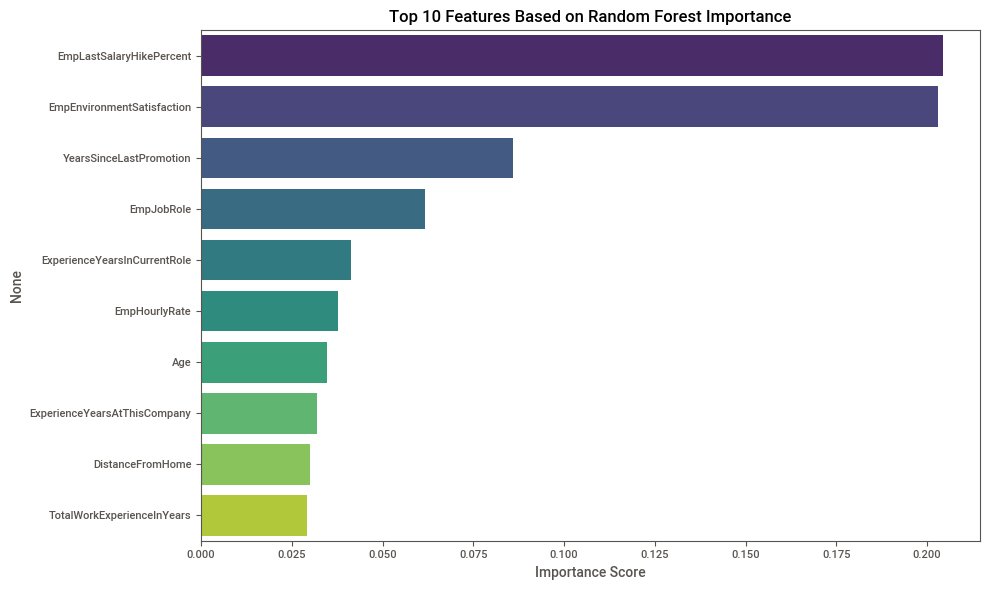

In [147]:
# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values[:10], y=feat_imp.index[:10], palette='viridis')
plt.title('Top 10 Features Based on Random Forest Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

Based on correlation analysis and Random Forest feature importance, the top three factors influencing employee performance are:

* EmpLastSalaryHikePercent — Salary growth appears to have the strongest impact, indicating that financial recognition boosts employee effectiveness.

* EmpEnvironmentSatisfaction — A positive and comfortable work environment is closely linked with better performance outcomes.

* YearsSinceLastPromotion — Time without career progression negatively affects performance, suggesting that timely promotions help maintain high engagement.

In [149]:
# Define top 10 features from Task 2
top_10_features = [
    'EmpLastSalaryHikePercent',
    'EmpEnvironmentSatisfaction',
    'YearsSinceLastPromotion',
    'EmpJobRole',
    'ExperienceYearsInCurrentRole',
    'EmpHourlyRate',
    'Age',
    'ExperienceYearsAtThisCompany',
    'DistanceFromHome',
    'TotalWorkExperienceInYears'
]

# Include the target column too
top_10_features.append('PerformanceRating')  # Or whatever your target variable is named

# Create new dataset
data= data[top_10_features].copy()

# Preview
data.head()

EmpLastSalaryHikePercent  EmpEnvironmentSatisfaction  \
0                        12                           4   
1                        12                           4   
2                        21                           4   
3                        15                           2   
4                        14                           1   

   YearsSinceLastPromotion  EmpJobRole  ExperienceYearsInCurrentRole  \
0                      0.0    2.855556                           7.0   
1                      1.0    2.855556                           7.0   
2                      1.0    2.855556                          13.0   
3                      1.0    2.960784                           6.0   
4                      2.0    2.855556                           2.0   

   EmpHourlyRate  Age  ExperienceYearsAtThisCompany  DistanceFromHome  \
0             55   32                          10.0                10   
1             42   47                           7.0                14   
2             48   40                          18.0                 5   
3             73   41                           5.0                10   
4             84   60                           2.0                16   

   TotalWorkExperienceInYears  PerformanceRating  
0                        10.0                  3  
1                        20.0                  3  
2                        20.0                  4  
3                        23.0                  3  
4                        10.0                  3

#### Feature Selection

<Axes: >

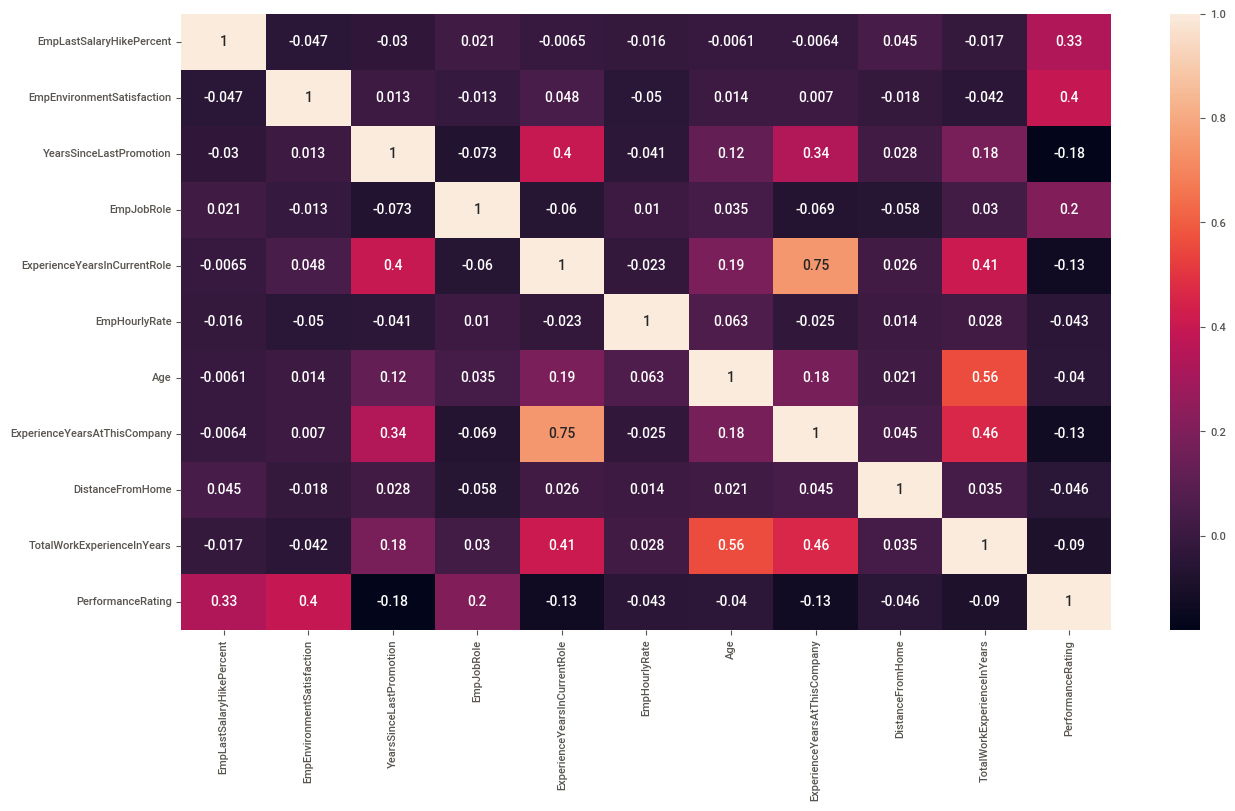

In [151]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True)

In [152]:
# Dropping feature ExperienceYearsAtThisCompany beacuse it is highly correlated with ExperienceYearsInCurrentRole,
# also operlaps with both ExperienceYearsInCurrentRoleand TotalWorkExperienceInYears 

data.drop('ExperienceYearsAtThisCompany',axis=1,inplace =True)

#### Scaling

In [154]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
d1=['PerformanceRating']
data1=sc.fit_transform(data.drop(d1,axis=1))

#### Task 3 : A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

#### Model Development

In [157]:
# Split the input and output feature in X and y

In [158]:
X=data1            #independent variable
y=data.PerformanceRating      #dependent variable

#### Balancing the output variable

In [160]:
from collections import Counter# importing counter to check count of each label
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE()#object creation
print(Counter(y))# checking count for each class 
X_sm,y_sm=sm.fit_resample(X,y)#applying sampling on target variable 
print(Counter(y_sm))# checking count after sampling for  each class

Counter({3: 874, 2: 194, 4: 132})
Counter({3: 874, 4: 874, 2: 874})


In [161]:
# Split the X and y for training and testing (X_train, y_train, X_test, y_test)

In [162]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.20, random_state=42)

In [163]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

#### 1. Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(random_state=42)
clf.fit(X_train, y_train)   #training

LogisticRegression(random_state=42)

In [166]:
y_pred1=clf.predict(X_test)

In [167]:
y_train_pred1=clf.predict(X_train)

#### Accuracy of Testing data

In [169]:
a2=accuracy_score(y_test,y_pred1)
a2

0.8133333333333334

In [170]:
pd.crosstab(y_test,y_pred1)#it will show you confusion matrix

col_0                2    3    4
PerformanceRating               
2                  163   13    8
3                   36  108   29
4                    1   11  156

In [171]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           2       0.81      0.89      0.85       184
           3       0.82      0.62      0.71       173
           4       0.81      0.93      0.86       168

    accuracy                           0.81       525
   macro avg       0.81      0.81      0.81       525
weighted avg       0.81      0.81      0.81       525



In [172]:
f1=round(f1_score(y_test,y_pred1,average='weighted'),2)
f1

0.81

In [173]:
# For training data

In [174]:
a_2=accuracy_score(y_train,y_train_pred1)
a_2

0.8187887458273725

In [175]:
pd.crosstab(y_train,y_train_pred1)

col_0                2    3    4
PerformanceRating               
2                  601   55   34
3                  105  514   82
4                   32   72  602

In [176]:
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           2       0.81      0.87      0.84       690
           3       0.80      0.73      0.77       701
           4       0.84      0.85      0.85       706

    accuracy                           0.82      2097
   macro avg       0.82      0.82      0.82      2097
weighted avg       0.82      0.82      0.82      2097



#### Cross Validation

In [178]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X_train,y_train,cv=3,scoring='f1_weighted')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.82646519 0.8192183  0.80909831]
Cross validation Score: 0.8182606023068063
Std : 0.007122265243936336


In [179]:
c1=round(scores.mean(),2)

#### ROC AUC curve

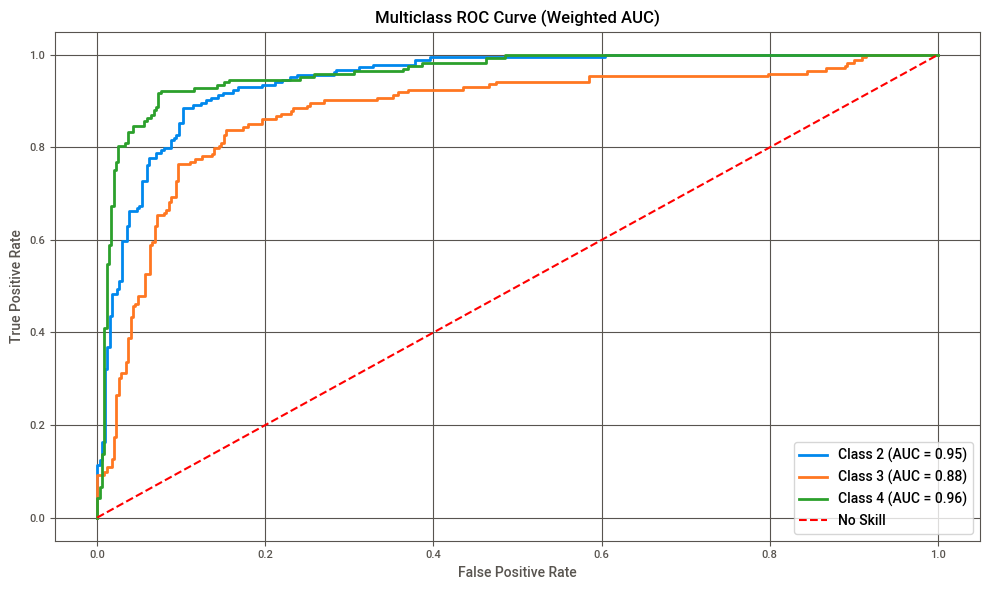

Weighted ROC AUC Score (OvO): 0.93


In [181]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Binarize the true multiclass labels
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])
y_pred_prob = clf.predict_proba(X_test)

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))

for i, class_label in enumerate([2, 3, 4]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

# Reference diagonal
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Weighted AUC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute overall Weighted AUC Score (One-vs-One or One-vs-Rest)
roc_auc_weighted = roc_auc_score(y_test_bin, y_pred_prob, average='weighted', multi_class='ovo')
print(f"Weighted ROC AUC Score (OvO): {roc_auc_weighted:.2f}")

In [182]:
R1=round(roc_auc_weighted,2)

#### 2 Decision Tree Classifier

In [184]:
from sklearn.tree import DecisionTreeClassifier  #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier(random_state=42)      #object creation for decision tree  
dt.fit(X_train,y_train)     #training the model 

DecisionTreeClassifier(random_state=42)

In [185]:
y_pred2=dt.predict(X_test)

In [186]:
y_train_pred2=dt.predict(X_train)

#### Accuracy of testing data

In [188]:
a2=accuracy_score(y_test,y_pred2)
a2

0.9238095238095239

In [189]:
pd.crosstab(y_test,y_pred2)#it will show you confusion matrix

col_0                2    3    4
PerformanceRating               
2                  173    7    4
3                    9  154   10
4                    4    6  158

In [190]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           2       0.93      0.94      0.94       184
           3       0.92      0.89      0.91       173
           4       0.92      0.94      0.93       168

    accuracy                           0.92       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.92      0.92      0.92       525



In [191]:
f2=round(f1_score(y_test,y_pred2,average='weighted'),2)
f2

0.92

#### For training data

In [193]:
a_2=accuracy_score(y_train,y_train_pred2)
a_2

1.0

In [194]:
pd.crosstab(y_train,y_train_pred2)

col_0                2    3    4
PerformanceRating               
2                  690    0    0
3                    0  701    0
4                    0    0  706

In [195]:
print(classification_report(y_train, y_train_pred2))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       701
           4       1.00      1.00      1.00       706

    accuracy                           1.00      2097
   macro avg       1.00      1.00      1.00      2097
weighted avg       1.00      1.00      1.00      2097



In [196]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt,X_train,y_train,cv=3,scoring='f1_weighted')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.91007489 0.91579188 0.90438032]
Cross validation Score: 0.9100823642663772
Std : 0.004658751517182146


In [197]:
c2=round(scores.mean(),2)

#### AUC ROC Curve

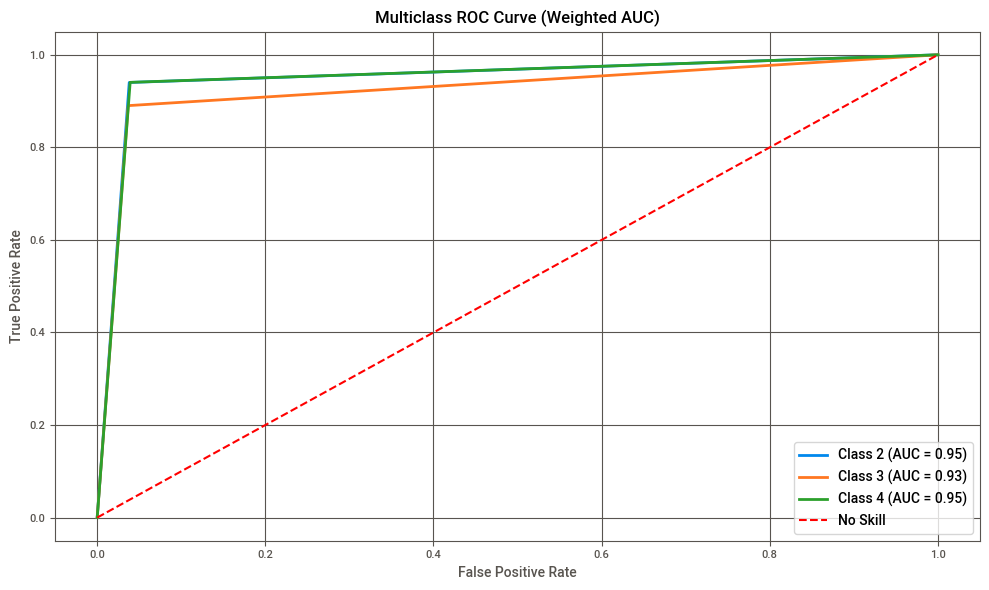

Weighted ROC AUC Score (OvO): 0.94


In [199]:
# Binarize the true multiclass labels
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])
y_pred_prob = dt.predict_proba(X_test)

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))

for i, class_label in enumerate([2, 3, 4]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

# Reference diagonal
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Weighted AUC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute overall Weighted AUC Score (One-vs-One or One-vs-Rest)
roc_auc_weighted = roc_auc_score(y_test_bin, y_pred_prob, average='weighted', multi_class='ovo')
print(f"Weighted ROC AUC Score (OvO): {roc_auc_weighted:.2f}")

In [200]:
R2=round(roc_auc_weighted,2)

#### 3. Random Forest Classifier

In [202]:
from sklearn.ensemble import RandomForestClassifier #importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=1) #object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)  #training the data

RandomForestClassifier(n_jobs=1, random_state=42)

In [203]:
y_pred3=rf_clf.predict(X_test)

In [204]:
y_train_pred3 = rf_clf.predict(X_train)

#### Accuracy of testing data

In [206]:
a3=accuracy_score(y_test,y_pred3)
a3

0.9619047619047619

In [207]:
pd.crosstab(y_test,y_pred3)

col_0                2    3    4
PerformanceRating               
2                  178    5    1
3                    7  164    2
4                    0    5  163

In [208]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           2       0.96      0.97      0.96       184
           3       0.94      0.95      0.95       173
           4       0.98      0.97      0.98       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



In [209]:
f3=round(f1_score(y_test,y_pred3,average='weighted'),2)
f3

0.96

#### Accuracy of Training data

In [211]:
a_3=accuracy_score(y_train,y_train_pred3)
a_3

1.0

In [212]:
f_3=f1_score(y_train,y_train_pred3,average='weighted')
f_3

1.0

In [213]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_clf,X_train,y_train,cv=3,scoring='f1_weighted')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.95994879 0.9486193  0.95429072]
Cross validation Score: 0.9542862695344354
Std : 0.004625244711056492


In [214]:
c3=round(scores.mean(),2)

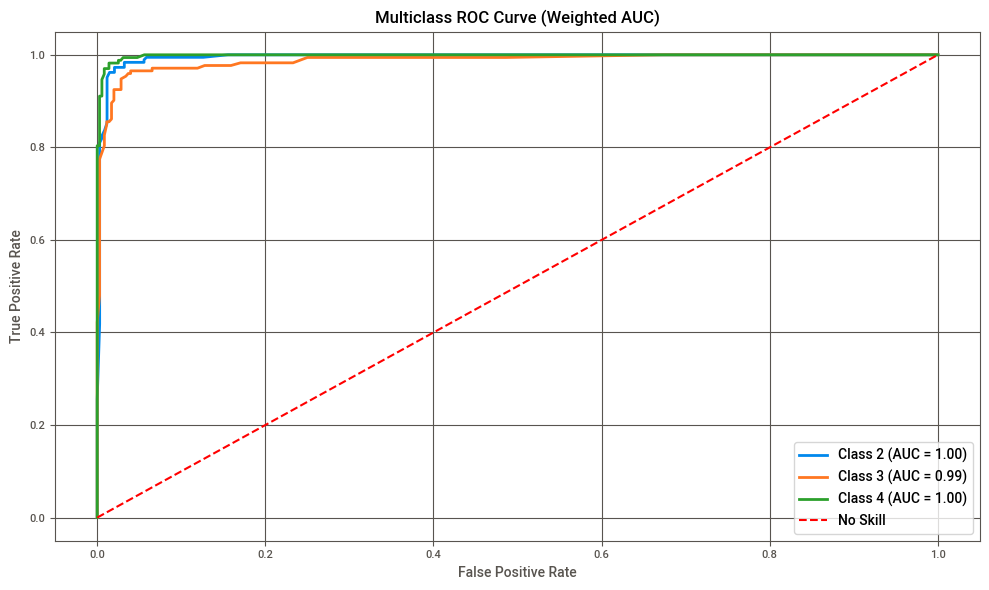

Weighted ROC AUC Score (OvO): 0.99


In [215]:
# Binarize the true multiclass labels
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])
y_pred_prob = rf_clf.predict_proba(X_test)

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))

for i, class_label in enumerate([2, 3, 4]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

# Reference diagonal
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Weighted AUC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute overall Weighted AUC Score (One-vs-One or One-vs-Rest)
roc_auc_weighted = roc_auc_score(y_test_bin, y_pred_prob, average='weighted', multi_class='ovo')
print(f"Weighted ROC AUC Score (OvO): {roc_auc_weighted:.2f}")

In [216]:
R3=round(roc_auc_weighted,2)

#### 4. XGBoost Classifier

In [218]:
# Step 1: Create mapping
label_mapping = {2: 0, 3: 1, 4: 2}

In [219]:
# Step 2: Apply mapping to training and test targets
y_train_mapped = y_train.map(label_mapping)
y_test_mapped = y_test.map(label_mapping)

In [220]:
from xgboost import XGBClassifier
xgb_r = XGBClassifier(random_state=42)

In [221]:
xgb_r.fit(X_train, y_train_mapped)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [222]:
y_train_pred4= xgb_r.predict(X_train)
y_pred4= xgb_r.predict(X_test)

In [223]:
# Reverse mapping for interpretation
inverse_mapping = {v: k for k, v in label_mapping.items()}
y_pred4 = pd.Series(y_pred4).map(inverse_mapping)
y_train_pred4 = pd.Series(y_train_pred4).map(inverse_mapping)

#### Accuracy of testing data

In [225]:
a4=accuracy_score(y_test,y_pred4)
a4

0.9619047619047619

In [226]:
pd.crosstab(y_test,y_pred4)

col_0               2   3   4
PerformanceRating            
2                   6  12   5
3                  32  25  25
4                   3   2   2

In [227]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           2       0.97      0.96      0.97       184
           3       0.94      0.97      0.95       173
           4       0.98      0.96      0.97       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



In [228]:
f4=round(f1_score(y_test,y_pred4,average='weighted'),2)
f4

0.96

#### Accuracy of training data

In [230]:
a_4=accuracy_score(y_train,y_train_pred4)
a_4

1.0

In [231]:
f_4=f1_score(y_train,y_train_pred4,average='weighted')
f_4

1.0

#### Cross Validation

In [233]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_r,X_train,y_train_mapped,cv=3,scoring='f1_weighted')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.95568307 0.95715006 0.95425627]
Cross validation Score: 0.9556964659257364
Std : 0.0011814248969771047


In [234]:
c4=round(scores.mean(),2)

#### ROC AUC Curve

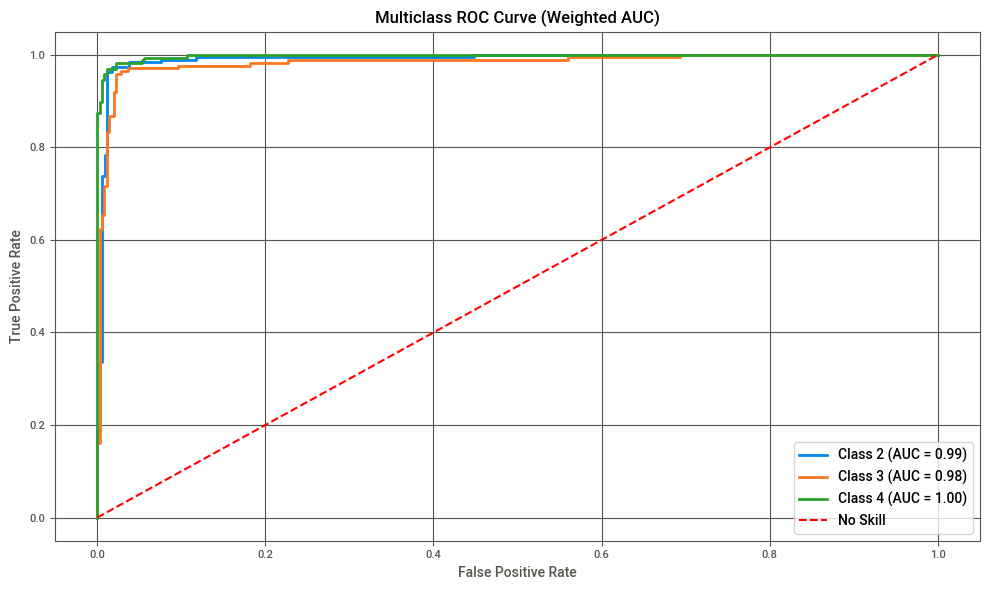

Weighted ROC AUC Score (OvO): 0.99


In [236]:
# Binarize the true multiclass labels
y_test_bin = label_binarize(y_test, classes=[2, 3, 4])
y_pred_prob = xgb_r.predict_proba(X_test)

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))

for i, class_label in enumerate([2, 3, 4]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {class_label} (AUC = {roc_auc:.2f})")

# Reference diagonal
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill')

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Weighted AUC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Compute overall Weighted AUC Score (One-vs-One or One-vs-Rest)
roc_auc_weighted = roc_auc_score(y_test_bin, y_pred_prob, average='weighted', multi_class='ovo')
print(f"Weighted ROC AUC Score (OvO): {roc_auc_weighted:.2f}")

In [237]:
R4=round(roc_auc_weighted,2)

#### Model Performance summary

The table below summarizes the performance metrics of different machine learning models evaluated during the project:

In [240]:
model_name= ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','XGBoost Classifier'] 
f1_score= [f1,f2,f3,f4]
cross_validation_score = [c1,c2,c3,c4]
roc_auc_score = [R1,R2,R3,R4]
dict={'Model Name':model_name , 'F1 Score':f1_score, 'Cross_Validation_Score': cross_validation_score , 'ROC AUC Score':roc_auc_score}

In [241]:
data_frame = pd.DataFrame(dict)
data_frame

Model Name  F1 Score  Cross_Validation_Score  ROC AUC Score
0       Logistic Regression      0.81                    0.82           0.93
1  Decision Tree Classifier      0.92                    0.91           0.94
2  Random Forest Classifier      0.96                    0.95           0.99
3        XGBoost Classifier      0.96                    0.96           0.99

**Conclusion:**
After evaluating multiple classification models on employee performance prediction, both Random Forest and XGBoost emerged as the top performers — delivering:

F1 Score: 0.96

Cross-Validation Score: 0.96

Weighted ROC AUC: 0.99

This indicates strong generalization and highly effective class separation, even in the presence of class imbalance. Between the two:

Random Forest offers greater interpretability and ease of tuning

XGBoost provides better scalability and fine-grained performance control

Given the near-identical results, either can be selected based on deployment or organizational needs. Simpler models like Decision Trees also showed competitive performance, reinforcing that the feature engineering and preprocessing pipeline were well-designed.

➡️ Overall, the model architecture, preprocessing strategy (including SMOTE balancing), and evaluation metrics demonstrate a robust, production-ready solution for predicting employee performance ratings with high accuracy and fairness.

#### Task 4 : Recommendations to improve the employee performance based on insights from analysis.

**1. Prioritize Support for Low-Performing Departments**

Sales and Finance, with the lowest performance ratings, may benefit from focused coaching, clearer KPIs, and improved resource allocation.

Consider conducting pulse surveys or interviews to identify pain points and training needs within these teams.

**2. Optimize Compensation Strategies**

Since EmpLastSalaryHikePercent is a key performance driver, implement structured and transparent performance-linked hike policies.

Reward consistent performers and communicate clearly how hikes align with contributions.

**3. Enhance Workplace Environment**

EmpEnvironmentSatisfaction emerged as a top factor—focus on team culture, workload balance, manager accessibility, and peer support.

Small improvements in workplace conditions can yield meaningful gains in employee engagement and output.

**4. Address Career Growth and Recognition**

Features like YearsSinceLastPromotion highlight the importance of career development.

Offer internal mobility options, skill-building programs, and leadership development tracks to retain and motivate employees.

**5. Leverage High-Performing Departments as Models**

Learn from Development and Data Science teams’ processes, leadership styles, and resource planning.

Apply successful practices selectively to other departments after assessing fit.

**6. Role-Level Tailored Interventions**

Since EmpJobRole impacts performance, create role-specific engagement strategies—like customized training modules, productivity tools, or adjusted targets.

**Overall Conclusion** This project provided a detailed, data-driven examination of employee performance patterns across departments and roles within the organization.

From the department-wise analysis, key disparities emerged—Development excelled with the highest average performance despite its large size, while Sales, though the biggest team, showed the lowest performance, signaling a need for strategic support. Data Science, although smaller, maintained high performance, underscoring the value of focused expertise.

In the feature importance analysis, salary hikes, environment satisfaction, and career growth indicators (such as promotions) stood out as the top drivers of performance. These insights consistently highlighted that employees perform better when they feel recognized, supported, and rewarded fairly.

Combining these findings, the project offers a strong foundation for actionable recommendations. By aligning organizational strategies with what truly influences performance—compensation fairness, environmental support, and growth opportunities—companies can foster higher engagement and productivity.

Overall, the project equips decision-makers with clear signals on where to focus resources, which teams need support, and how to build a culture that empowers high performance across the board.